In [ ]:
import folium
mymap=folium.Map(location=[1.30287928, 103.12093810928],
                 width=950,
                 height=550,
                 zoom_start=12,
                 tiles='openstreetmap')
mymap

# Buổi 1 - Database

In [ ]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="my-appplicatione")
location=geolocator.geocode("Nha Trang Novotel")
print(location.address)

Novotel, Tôn Đản, Phường Lộc Thọ, Thành phố Nha Trang, Tỉnh Khánh Hòa, 48058, Việt Nam


In [ ]:
print((location.latitude,location.longitude))
print(location.raw)

(12.2378023, 109.1964739)
{'place_id': 239308623, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 3448354850, 'lat': '12.2378023', 'lon': '109.1964739', 'class': 'tourism', 'type': 'hotel', 'place_rank': 30, 'importance': 5.969710841530507e-05, 'addresstype': 'tourism', 'name': 'Novotel', 'display_name': 'Novotel, Tôn Đản, Phường Lộc Thọ, Thành phố Nha Trang, Tỉnh Khánh Hòa, 48058, Việt Nam', 'boundingbox': ['12.2377523', '12.2378523', '109.1964239', '109.1965239']}


In [ ]:
from geopy.distance import geodesic
newport_ri=(41.12039810,-71.1209821)
cleveland_oh=(41.123019283,-81.10913)
print(geodesic(newport_ri,cleveland_oh).miles)

520.9246031306374


In [ ]:
from geopy.distance import great_circle
newport_ri=(41.12039810,-71.1209821)
cleveland_oh=(41.123019283,-81.10913)
print(great_circle(newport_ri,cleveland_oh).miles)

519.5885812104028


In [ ]:
import datetime
d=datetime.date(2921,5,19)
print(d)

2921-05-19


In [ ]:
import datetime
datetime_object=datetime.datetime.now()
print(datetime_object)

2025-03-24 12:22:36.805956


In [ ]:
from datetime import date
today=date.today()
print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2025
Current month: 3
Current day: 24


# Buổi 2 - Fuzzy Logic

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.7 MB/s eta 0:00:00


In [ ]:
#Goi thu vien
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Tạo hàm liên thuộc cho inputs
food=ctrl.Antecedent(np.arange(0,10.1,0.1),"food")
service=ctrl.Antecedent(np.arange(0,10.1,0.1),"service")
tip=ctrl.Consequent(np.arange(10,25.1,0.1),"tip")

food['poor']=fuzz.trimf(food.universe,[0,0,5]) #trimf = triangle membership function
food['normal']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['normal']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['small']=fuzz.trimf(tip.universe,[10,13.75,17.5])
tip['average']=fuzz.trimf(tip.universe,[13.75,17.5,21.25])
tip['much']=fuzz.trimf(tip.universe,[17.5,21.25,25])

In [ ]:
#Luật điều khiển
rule1=ctrl.Rule(food['poor']|service['poor'],tip['small'])
rule2=ctrl.Rule(food['poor']|service['normal'],tip['small'])
rule3=ctrl.Rule(food['poor']|service['good'],tip['average'])
rule4=ctrl.Rule(food['normal']|service['poor'],tip['small'])
rule5=ctrl.Rule(food['normal']|service['normal'],tip['average'])
rule6=ctrl.Rule(food['normal']|service['good'],tip['much'])
rule7=ctrl.Rule(food['good']|service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']|service['normal'],tip['much'])
rule9=ctrl.Rule(food['good']|service['good'],tip['much'])

15.625477448191795


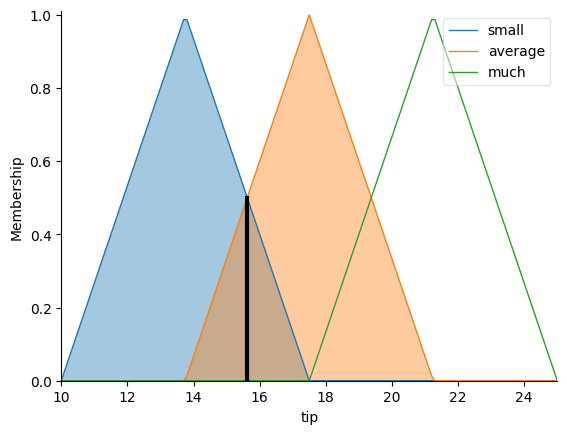

In [ ]:
#Mô phỏng và điều khiển
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
#Đánh giá và kiểm tra lại
tipping.input['food']=0
tipping.input['service']=0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

50.00000000000003


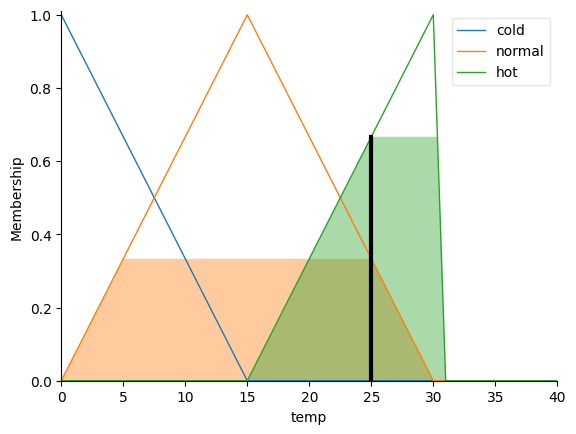

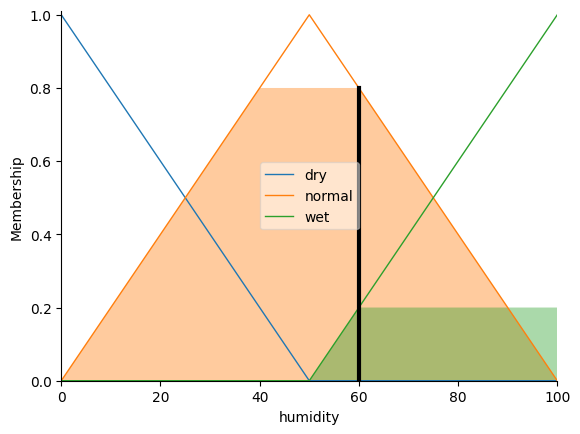

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temp=ctrl.Antecedent(np.arange(0,41,1),'temp')
humidity=ctrl.Antecedent(np.arange(0,101,1),'humidity')
fan=ctrl.Consequent(np.arange(0,101,1),'fan')

temp['cold']=fuzz.trimf(temp.universe,[0,0,15])
temp['normal']=fuzz.trimf(temp.universe,[0,15,30])
temp['hot']=fuzz.trimf(temp.universe,[15,30,30])

humidity['dry']=fuzz.trimf(humidity.universe,[0,0,50])
humidity['normal']=fuzz.trimf(humidity.universe,[0,50,100])
humidity['wet']=fuzz.trimf(humidity.universe,[50,100,100])

fan['low']=fuzz.trimf(fan.universe,[0,0,50])
fan['normal']=fuzz.trimf(fan.universe,[0,50,100])
fan['high']=fuzz.trimf(fan.universe,[50,100,100])

rule1=ctrl.Rule(temp['cold']|humidity['dry'],fan['low'])
rule2=ctrl.Rule(temp['cold']|humidity['normal'],fan['low'])
rule3=ctrl.Rule(temp['cold']|humidity['wet'],fan['normal'])
rule4=ctrl.Rule(temp['normal']|humidity['dry'],fan['low'])
rule5=ctrl.Rule(temp['normal']|humidity['normal'],fan['normal'])
rule6=ctrl.Rule(temp['normal']|humidity['wet'],fan['high'])
rule7=ctrl.Rule(temp['hot']|humidity['dry'],fan['normal'])
rule8=ctrl.Rule(temp['hot']|humidity['normal'],fan['high'])
rule9=ctrl.Rule(temp['hot']|humidity['wet'],fan['high'])

fan_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
fan=ctrl.ControlSystemSimulation(fan_ctrl)
fan.input['temp']=25
fan.input['humidity']=60
fan.compute()
print(fan.output['fan'])
temp.view(sim=fan)
humidity.view(sim=fan)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic_condition=ctrl.Antecedent(np.arange(0,11,0.1),'traffic_condition')
distance=ctrl.Antecedent(np.arange(0,16,0.5),'distance')
weather_condition=ctrl.Antecedent(np.arange(0,3,0.1),'weather_condition')
order_preparation_time=ctrl.Antecedent(np.arange(0,26,0.5),'order_preparation_time')
driver_fatique=ctrl.Antecedent(np.arange(0,11,0.1),'driver_fatique')

delivery_time=ctrl.Consequent(np.arange(0,50,0.1),'delivery_time')
incentive=ctrl.Consequent(np.arange(0,61,1),'incentive')
rating=ctrl.Consequent(np.arange(0,5,0.1),'rating')

traffic_condition['L']=fuzz.trimf(traffic_condition.universe,[0,0,5])
traffic_condition['M']=fuzz.trimf(traffic_condition.universe,[0,5,10])
traffic_condition['H']=fuzz.trimf(traffic_condition.universe,[5,10,10])

distance['S']=fuzz.trimf(distance.universe,[0,0,7.5])
distance['M']=fuzz.trimf(distance.universe,[0,7.5,15])
distance['L']=fuzz.trimf(distance.universe,[8,15,15])

weather_condition['C']=fuzz.trimf(weather_condition.universe,[0,0,1])
weather_condition['R']=fuzz.trimf(weather_condition.universe,[0,1,2])
weather_condition['S']=fuzz.trimf(weather_condition.universe,[1,2,2])

order_preparation_time['S']=fuzz.trimf(order_preparation_time.universe,[0,0,12.5])
order_preparation_time['M']=fuzz.trimf(order_preparation_time.universe,[0,12.5,25])
order_preparation_time['L']=fuzz.trimf(order_preparation_time.universe,[12.5,25,25])

driver_fatique['L']=fuzz.trimf(driver_fatique.universe,[0,0,5])
driver_fatique['M']=fuzz.trimf(driver_fatique.universe,[0,5,10])
driver_fatique['H']=fuzz.trimf(driver_fatique.universe,[5,10,10])

delivery_time['S']=fuzz.trimf(delivery_time.universe,[0,0,20])
delivery_time['M']=fuzz.trimf(delivery_time.universe,[12,25,37])
delivery_time['L']=fuzz.trimf(delivery_time.universe,[30,40,50])

incentive['L']=fuzz.trimf(incentive.universe,[0,0,20])
incentive['M']=fuzz.trimf(incentive.universe,[10,30,50])
incentive['H']=fuzz.trimf(incentive.universe,[40,60,60])

rating['P']=fuzz.trimf(rating.universe,[0,1.5,3])
rating['A']=fuzz.trimf(rating.universe,[2.5,3,4.5])
rating['E']=fuzz.trimf(rating.universe,[4.5,5,5])

In [ ]:
rule1=ctrl.Rule(traffic_condition['L']|distance['S'],delivery_time['S'])
rule2=ctrl.Rule(traffic_condition['M']|distance['M'],delivery_time['M'])
rule3=ctrl.Rule(traffic_condition['H']|distance['L'],delivery_time['L'])

rule4=ctrl.Rule(weather_condition['C'],incentive['L'])
rule5=ctrl.Rule(weather_condition['R'],incentive['M'])
rule6=ctrl.Rule(weather_condition['S'],incentive['H'])

rule7=ctrl.Rule(order_preparation_time['S']|traffic_condition['L'],delivery_time['S'])
rule8=ctrl.Rule(order_preparation_time['M']|traffic_condition['M'],delivery_time['M'])
rule9=ctrl.Rule(order_preparation_time['L']|traffic_condition['H'],delivery_time['L'])

rule10=ctrl.Rule(driver_fatique['L'],rating['E'])
rule11=ctrl.Rule(driver_fatique['M'],rating['A'])
rule12=ctrl.Rule(driver_fatique['H'],rating['P'])

rule13=ctrl.Rule(distance['L']|weather_condition['S']|traffic_condition['H'],delivery_time['L'],incentive['H'])
rule14=ctrl.Rule(distance['S']|weather_condition['C']|traffic_condition['L'],delivery_time['S'],incentive['L'])
rule15=ctrl.Rule(driver_fatique['H']|traffic_condition['H'],rating['P'],delivery_time['L'])

Thời gian dự kiến: 23.43013858238549
Tiền thưởng: 6.666666666666667
Đánh giá: 1.8148594377510043


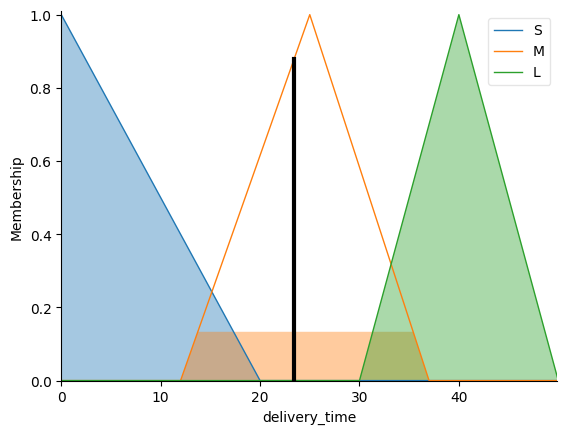

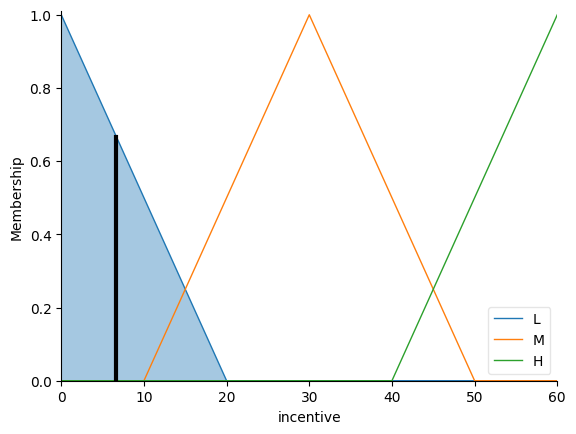

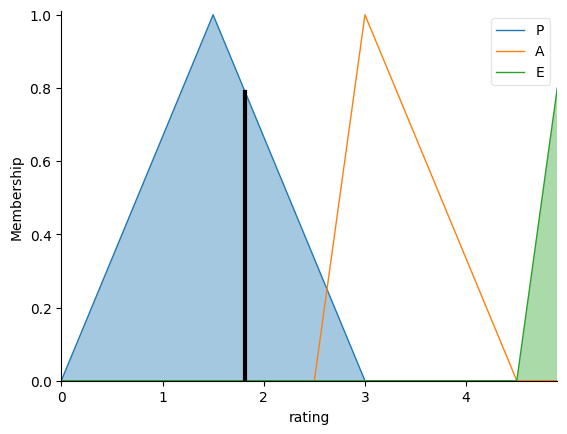

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic_condition']=10
fuzzy_system.input['distance']=1
fuzzy_system.input['weather_condition']=0
fuzzy_system.input['order_preparation_time']=1
fuzzy_system.input['driver_fatique']=0
fuzzy_system.compute()
print('Thời gian dự kiến:',fuzzy_system.output['delivery_time'])
print('Tiền thưởng:',fuzzy_system.output['incentive'])
print('Đánh giá:',fuzzy_system.output['rating'])
delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)

# HW Buổi 2

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.4 MB/s eta 0:00:00


3.950000000000011


'wind.view()\ntemperature.view()\nrainfall.view()'

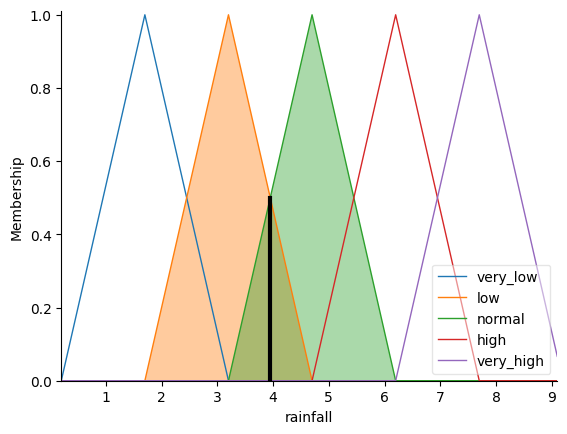

In [ ]:
#2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

rule1 = ctrl.Rule(wind['very_low'] | temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['very_low'] | temperature['low'], rainfall['very_low'])
rule3 = ctrl.Rule(wind['very_low'] | temperature['normal'], rainfall['low'])
rule4 = ctrl.Rule(wind['very_low'] | temperature['high'], rainfall['low'])
rule5 = ctrl.Rule(wind['very_low'] | temperature['very_high'], rainfall['low'])
rule6 = ctrl.Rule(wind['low'] | temperature['very_low'], rainfall['very_low'])
rule7 = ctrl.Rule(wind['low'] | temperature['low'], rainfall['low'])
rule8 = ctrl.Rule(wind['low'] | temperature['normal'], rainfall['low'])
rule9 = ctrl.Rule(wind['low'] | temperature['high'], rainfall['normal'])
rule10 = ctrl.Rule(wind['low'] | temperature['very_high'], rainfall['normal'])
rule11 = ctrl.Rule(wind['normal'] | temperature['very_low'], rainfall['low'])
rule12 = ctrl.Rule(wind['normal'] | temperature['low'], rainfall['low'])
rule13 = ctrl.Rule(wind['normal'] | temperature['normal'], rainfall['normal'])
rule14 = ctrl.Rule(wind['normal'] | temperature['high'], rainfall['normal'])
rule15 = ctrl.Rule(wind['normal'] | temperature['very_high'], rainfall['high'])
rule16 = ctrl.Rule(wind['high'] | temperature['very_low'], rainfall['low'])
rule17 = ctrl.Rule(wind['high'] | temperature['low'], rainfall['low'])
rule18 = ctrl.Rule(wind['high'] | temperature['normal'], rainfall['normal'])
rule19 = ctrl.Rule(wind['high'] | temperature['high'], rainfall['high'])
rule20 = ctrl.Rule(wind['high'] | temperature['very_high'], rainfall['high'])
rule21 = ctrl.Rule(wind['very_high'] | temperature['very_low'], rainfall['low'])
rule22 = ctrl.Rule(wind['very_high'] | temperature['low'], rainfall['low'])
rule23 = ctrl.Rule(wind['very_high'] | temperature['normal'], rainfall['normal'])
rule24 = ctrl.Rule(wind['very_high'] | temperature['high'], rainfall['high'])
rule25 = ctrl.Rule(wind['very_high'] | temperature['very_high'], rainfall['very_high'])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 3.1
rainfalling.input['temperature'] = 30
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)
'''wind.view()
temperature.view()
rainfall.view()'''

7.497133807040431


'duong_trong_mau.view()\nBMI.view()\ndi_tieu.view()\nmet_moi.view()'

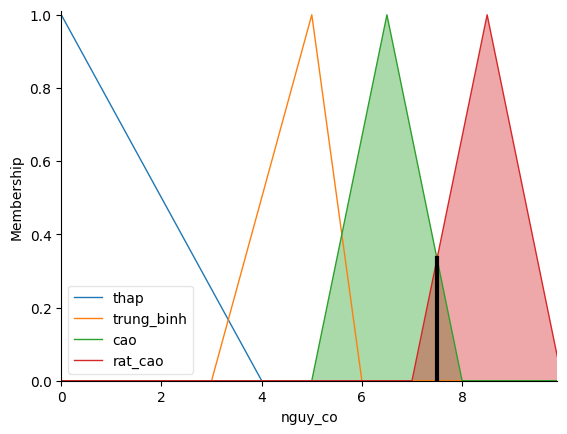

In [ ]:
#2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

duong_trong_mau = ctrl.Antecedent(np.arange(70,210,0.1),'duong_trong_mau')
BMI = ctrl.Antecedent(np.arange(17.5,31,0.1),'BMI')
di_tieu = ctrl.Antecedent(np.arange(1,10,0.1),'di_tieu')
met_moi= ctrl.Antecedent(np.arange(0,100,1),'met_moi')
nguy_co= ctrl.Consequent(np.arange(0,10,0.1),'nguy_co')

duong_trong_mau['thap'] = fuzz.trimf(duong_trong_mau.universe, [70,70,90])
duong_trong_mau['binh_thuong'] = fuzz.trimf(duong_trong_mau.universe, [80,100,120])
duong_trong_mau['cao'] = fuzz.trimf(duong_trong_mau.universe, [120,160,200])
duong_trong_mau['rat_cao'] = fuzz.trimf(duong_trong_mau.universe, [190,210,210])

BMI['thieu_can']=  fuzz.trimf(BMI.universe, [17.5,17.5,19])
BMI['binh_thuong']= fuzz.trimf(BMI.universe, [18,21.5,25.5])
BMI['thua_can']=fuzz.trimf(BMI.universe, [24,24.5,30])
BMI['beo_phi']=fuzz.trimf(BMI.universe, [25,31,31])

di_tieu['it'] = fuzz.trimf(di_tieu.universe, [1,1,3])
di_tieu['binh_thuong'] = fuzz.trimf(di_tieu.universe, [3,5,7])
di_tieu['nhieu'] = fuzz.trimf(di_tieu.universe, [7,10,10])

met_moi['thap'] = fuzz.trimf(met_moi.universe, [0,0,40])
met_moi['trung_binh'] = fuzz.trimf(met_moi.universe, [30,50,70])
met_moi['cao'] = fuzz.trimf(met_moi.universe, [70,80,100])

nguy_co['thap'] = fuzz.trimf(nguy_co.universe, [0,0,4])
nguy_co['trung_binh'] = fuzz.trimf(nguy_co.universe, [3,5,6])
nguy_co['cao'] = fuzz.trimf(nguy_co.universe, [5,6.5,8])
nguy_co['rat_cao'] = fuzz.trimf(nguy_co.universe, [7,8.5,10])

#Luật dựa trên lượng đường trong máu và tần suất đi tiểu
rule1=ctrl.Rule(duong_trong_mau['rat_cao']|di_tieu['nhieu'],nguy_co['rat_cao'])
rule2=ctrl.Rule(duong_trong_mau['rat_cao']|di_tieu['binh_thuong'],nguy_co['cao'])
rule3=ctrl.Rule(duong_trong_mau['cao']|di_tieu['nhieu'],nguy_co['cao'])
rule4=ctrl.Rule(duong_trong_mau['binh_thuong']|di_tieu['it'],nguy_co['thap'])

#Luật dựa trên lượng đường trong máu và BMI
rule5=ctrl.Rule(duong_trong_mau['rat_cao']|BMI['beo_phi'],nguy_co['rat_cao'])
rule6=ctrl.Rule(duong_trong_mau['rat_cao']|BMI['thua_can'],nguy_co['cao'])
rule7=ctrl.Rule(duong_trong_mau['cao']|BMI['thua_can'],nguy_co['cao'])
rule8=ctrl.Rule(duong_trong_mau['cao']|BMI['binh_thuong'],nguy_co['trung_binh'])
rule9=ctrl.Rule(duong_trong_mau['binh_thuong']|BMI['binh_thuong'],nguy_co['thap'])

#Luật dựa trên lượng đường trong máu và mệt mỏi
rule10=ctrl.Rule(duong_trong_mau['rat_cao']|met_moi['cao'],nguy_co['rat_cao'])
rule11=ctrl.Rule(duong_trong_mau['cao']|met_moi['cao'],nguy_co['cao'])
rule12=ctrl.Rule(duong_trong_mau['cao']|met_moi['trung_binh'],nguy_co['trung_binh'])
rule13=ctrl.Rule(duong_trong_mau['binh_thuong']|met_moi['thap'],nguy_co['thap'])

tieuduong_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
tieuduong = ctrl.ControlSystemSimulation(tieuduong_ctrl)
tieuduong.input['duong_trong_mau'] = 210
tieuduong.input['BMI'] = 30
tieuduong.input['di_tieu'] = 10
tieuduong.input['met_moi'] = 100
tieuduong.compute()
print(tieuduong.output['nguy_co'])
nguy_co.view(sim=tieuduong)
'''duong_trong_mau.view()
BMI.view()
di_tieu.view()
met_moi.view()'''

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


47.098548607941574


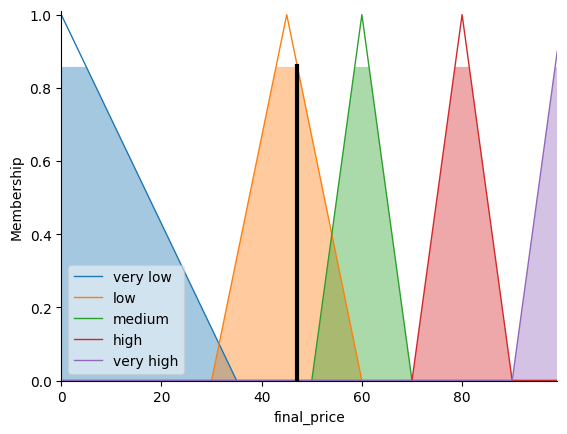

In [ ]:
#2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand_level = ctrl.Antecedent(np.arange(1,10,0.1),'demand_level')
competitor_pricing=ctrl.Antecedent(np.arange(0,100,1),'competitor_pricing')
production_cost=ctrl.Antecedent(np.arange(0,100,1),'production_cost')
seasonality=ctrl.Antecedent(np.arange(0,3,0.1),'seasonality')
stock_level=ctrl.Antecedent(np.arange(0,10,0.1),'stock_level')
final_price=ctrl.Consequent(np.arange(0,100,1),'final_price')

demand_level['low']=fuzz.trimf(demand_level.universe,[1,1,4.5])
demand_level['medium']=fuzz.trimf(demand_level.universe,[2,4.5,8])
demand_level['high']=fuzz.trimf(demand_level.universe,[6,9,10])

competitor_pricing['low']=fuzz.trimf(competitor_pricing.universe,[0,0,30])
competitor_pricing['medium']=fuzz.trimf(competitor_pricing.universe,[30,50,70])
competitor_pricing['high']=fuzz.trimf(competitor_pricing.universe,[70,100,100])

production_cost['low']=fuzz.trimf(production_cost.universe,[0,0,30])
production_cost['medium']=fuzz.trimf(production_cost.universe,[30,50,70])
production_cost['high']=fuzz.trimf(production_cost.universe,[70,100,100])

seasonality['offpeak']=fuzz.trimf(seasonality.universe,[0,0,1.5])
seasonality['normal']=fuzz.trimf(seasonality.universe,[0.5,1,2])
seasonality['peak']=fuzz.trimf(seasonality.universe,[2,3,3])

stock_level['low']=fuzz.trimf(stock_level.universe,[0,1,4.5])
stock_level['medium']=fuzz.trimf(stock_level.universe,[2,4.5,8])
stock_level['high']=fuzz.trimf(stock_level.universe,[6,9,10])

final_price['very low']=fuzz.trimf(final_price.universe,[0,0,35])
final_price['low']=fuzz.trimf(final_price.universe,[30,45,60])
final_price['medium']=fuzz.trimf(final_price.universe,[50,60,70])
final_price['high']=fuzz.trimf(final_price.universe,[70,80,90])
final_price['very high']=fuzz.trimf(final_price.universe,[90,100,100])

#Giá rất cao
rule1=ctrl.Rule(demand_level['high']|competitor_pricing['high']|stock_level['low'],final_price['very high'])
rule2=ctrl.Rule(demand_level['high']|seasonality['peak']|stock_level['medium'],final_price['very high'])
rule3=ctrl.Rule(demand_level['medium']|production_cost['high']|stock_level['low'],final_price['very high'])

#Giá cao
rule4=ctrl.Rule(demand_level['high']|competitor_pricing['medium']|stock_level['medium'],final_price['high'])
rule5=ctrl.Rule(demand_level['medium']|competitor_pricing['high']|stock_level['low'],final_price['high'])
rule=ctrl.Rule(demand_level['high']|seasonality['peak']|stock_level['medium'],final_price['high'])

#Giá trung bình
rule6=ctrl.Rule(demand_level['medium']|competitor_pricing['medium']|stock_level['medium'],final_price['medium'])
rule7=ctrl.Rule(demand_level['low']|competitor_pricing['high']|stock_level['medium'],final_price['medium'])
rule8=ctrl.Rule(demand_level['medium']|production_cost['medium']|stock_level['medium'],final_price['medium'])

#Giá thấp
rule9=ctrl.Rule(demand_level['low']|competitor_pricing['low']|stock_level['high'],final_price['low'])
rule10=ctrl.Rule(demand_level['medium']|production_cost['low']|stock_level['high'],final_price['low'])
rule11=ctrl.Rule(demand_level['low']|seasonality['offpeak']|stock_level['high'],final_price['low'])

#Giá rất thấp
rule12=ctrl.Rule(demand_level['low']|competitor_pricing['low']|stock_level['high'],final_price['very low'])
rule13=ctrl.Rule(demand_level['low']|seasonality['offpeak']|stock_level['high'],final_price['very low'])
rule14=ctrl.Rule(demand_level['medium']|competitor_pricing['low']|stock_level['high'],final_price['very low'])

price_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])
price=ctrl.ControlSystemSimulation(price_ctrl)
price.input['demand_level']=5
price.input['competitor_pricing']=19
price.input['production_cost']=46
price.input['seasonality']=2
price.input['stock_level']=4
price.compute()
print(price.output['final_price'])
final_price.view(sim=price)

4.844444444444446


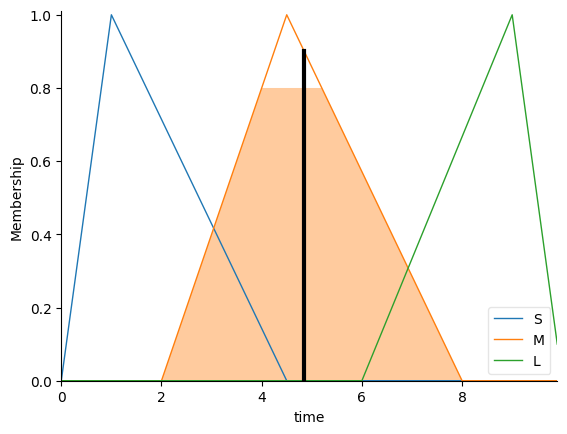

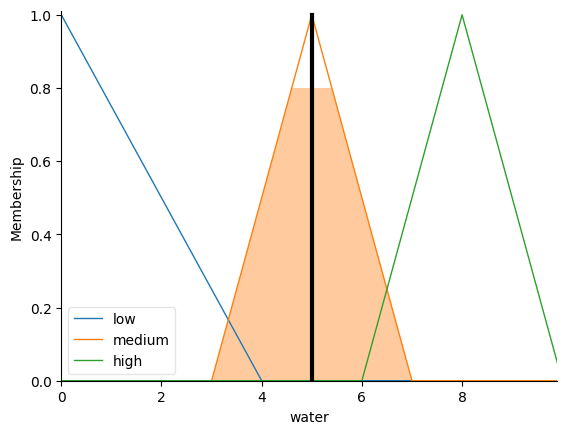

In [ ]:
#2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load = ctrl.Antecedent(np.arange(1,10,0.1),'load')
dirt_level=ctrl.Antecedent(np.arange(0,100,1),'dirt_level')
fabric_type=ctrl.Antecedent(np.arange(0,100,1),'fabric_type')
time=ctrl.Consequent(np.arange(0,10,0.1),'time')
water=ctrl.Consequent(np.arange(0,10,0.1),'water')

load['S']=fuzz.trimf(load.universe,[1,1,4.5])
load['M']=fuzz.trimf(load.universe,[2,4.5,8])
load['L']=fuzz.trimf(load.universe,[6,9,10])

dirt_level['low']=fuzz.trimf(dirt_level.universe,[0,0,30])
dirt_level['medium']=fuzz.trimf(dirt_level.universe,[30,50,70])
dirt_level['high']=fuzz.trimf(dirt_level.universe,[70,100,100])

fabric_type['D']=fuzz.trimf(fabric_type.universe,[0,0,30])
fabric_type['N']=fuzz.trimf(fabric_type.universe,[30,50,70])
fabric_type['H']=fuzz.trimf(fabric_type.universe,[70,100,100])

time['S']=fuzz.trimf(time.universe,[0,1,4.5])
time['M']=fuzz.trimf(time.universe,[2,4.5,8])
time['L']=fuzz.trimf(time.universe,[6,9,10])

water['low']=fuzz.trimf(water.universe,[0,0,4])
water['medium']=fuzz.trimf(water.universe,[3,5,7])
water['high']=fuzz.trimf(water.universe,[6,8,10])

#Luật dựa trên kích thước tải và mức độ bẩn
rule1=ctrl.Rule(load['S'] & dirt_level['low'],time['S'])
rule1_w=ctrl.Rule(load['S'] & dirt_level['low'],water['low'])

rule2=ctrl.Rule(load['S'] & dirt_level['medium'],time['M'])
rule2_w=ctrl.Rule(load['S'] & dirt_level['medium'],water['medium'])

rule3=ctrl.Rule(load['S'] & dirt_level['high'],time['L'])
rule3_w=ctrl.Rule(load['S'] & dirt_level['high'],water['medium'])

rule4=ctrl.Rule(load['M'] & dirt_level['low'],time['M'])
rule4_w=ctrl.Rule(load['M'] & dirt_level['low'],water['medium'])


rule5=ctrl.Rule(load['M'] & dirt_level['medium'],time['L'])
rule5_w=ctrl.Rule(load['M'] & dirt_level['medium'],water['medium'])


rule6=ctrl.Rule(load['M'] & dirt_level['high'],time['L'])
rule6_w=ctrl.Rule(load['M'] & dirt_level['high'],water['high'])


rule7=ctrl.Rule(load['L'] & dirt_level['low'],time['M'])
rule7_w=ctrl.Rule(load['L'] & dirt_level['low'],water['high'])


rule8=ctrl.Rule(load['L'] & dirt_level['medium'],time['L'])
rule8_w=ctrl.Rule(load['L'] & dirt_level['medium'],water['high'])


rule9=ctrl.Rule(load['L'] & dirt_level['high'],time['L'])
rule9_w=ctrl.Rule(load['L'] & dirt_level['high'],water['high'])


#Luật dựa trên loại vải
rule10=ctrl.Rule(fabric_type['D'],time['S'])
rule10_w=ctrl.Rule(fabric_type['D'],water['low'])


rule11=ctrl.Rule(fabric_type['N'],time['M'])
rule11_w=ctrl.Rule(fabric_type['N'],water['medium'])


rule12=ctrl.Rule(fabric_type['H'],time['L'])
rule12_w=ctrl.Rule(fabric_type['H'],water['high'])


#Luật kết hợp tất cả các yếu tố
rule13=ctrl.Rule(load['L'] & dirt_level['high'] & fabric_type['H'],time['L'])
rule13_w=ctrl.Rule(load['L'] & dirt_level['high'] & fabric_type['H'],water['high'])


rule14=ctrl.Rule(load['S'] & dirt_level['low'] & fabric_type['D'],time['S'])
rule14_w=ctrl.Rule(load['S'] & dirt_level['low'] & fabric_type['D'],water['low'])


rule15=ctrl.Rule(load['M'] & dirt_level['medium'] & fabric_type['N'],time['M'])
rule15_w=ctrl.Rule(load['M'] & dirt_level['medium'] & fabric_type['N'],water['medium'])


wash_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule1_w, rule2_w, rule3_w, rule4_w, rule5_w, rule6_w, rule7_w, rule8_w, rule9_w, rule10_w, rule11_w, rule12_w, rule13_w, rule14_w, rule15_w])
wash=ctrl.ControlSystemSimulation(wash_ctrl)
wash.input['load']=5
wash.input['dirt_level']=19
wash.input['fabric_type']=46
wash.compute()
print(wash.output['time'])
time.view(sim=wash)
water.view(sim=wash)

65.41338582677162
66.73076923076921


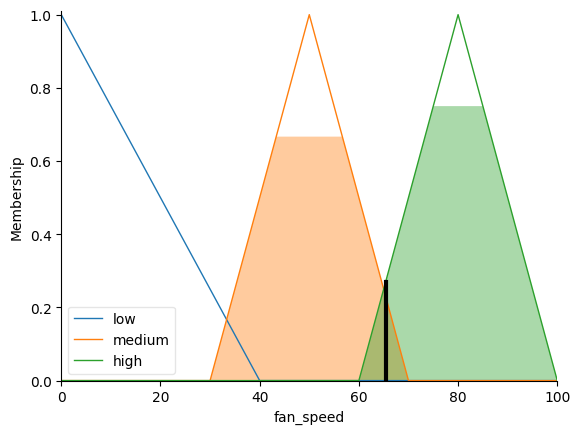

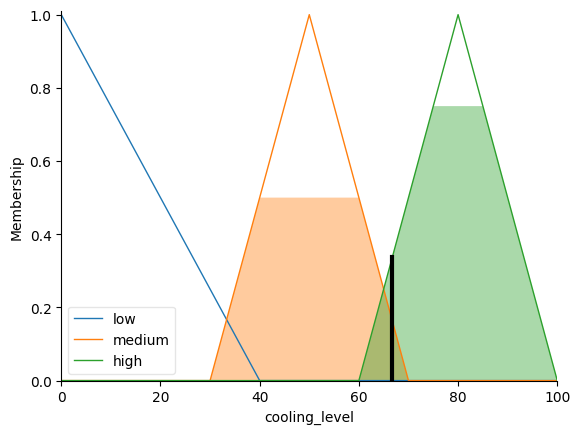

In [ ]:
#2.5
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

room_temp = ctrl.Antecedent(np.arange(15, 36, 1), 'room_temp')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
num_people = ctrl.Antecedent(np.arange(1, 11, 1), 'num_people')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')

room_temp['cold'] = fuzz.trimf(room_temp.universe, [15, 15, 20])
room_temp['cool'] = fuzz.trimf(room_temp.universe, [18, 22, 24])
room_temp['comfortable'] = fuzz.trimf(room_temp.universe, [22, 25, 27])
room_temp['warm'] = fuzz.trimf(room_temp.universe, [25, 29, 32])
room_temp['hot'] = fuzz.trimf(room_temp.universe, [30, 35, 35])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

num_people['few'] = fuzz.trimf(num_people.universe, [1, 2, 3])
num_people['moderate'] = fuzz.trimf(num_people.universe, [2, 5, 7])
num_people['many'] = fuzz.trimf(num_people.universe, [6, 8, 10])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 80, 100])

cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 40])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [30, 50, 70])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [60, 80, 100])

rules = [
    ctrl.Rule(room_temp['cold'], [fan_speed['low'], cooling_level['low']]),
    ctrl.Rule(room_temp['cool'], [fan_speed['low'], cooling_level['low']]),
    ctrl.Rule(room_temp['comfortable'], [fan_speed['medium'], cooling_level['medium']]),
    ctrl.Rule(room_temp['warm'], [fan_speed['high'], cooling_level['high']]),
    ctrl.Rule(room_temp['hot'], [fan_speed['high'], cooling_level['high']]),
    ctrl.Rule(humidity['low'], cooling_level['low']),
    ctrl.Rule(humidity['medium'], cooling_level['medium']),
    ctrl.Rule(humidity['high'], cooling_level['high']),
    ctrl.Rule(num_people['few'], fan_speed['low']),
    ctrl.Rule(num_people['moderate'], fan_speed['medium']),
    ctrl.Rule(num_people['many'], fan_speed['high']),
    ctrl.Rule(room_temp['hot'] & humidity['high'] & num_people['many'], [cooling_level['high'], fan_speed['high']]),
    ctrl.Rule(room_temp['comfortable'] & humidity['medium'] & num_people['moderate'], [cooling_level['medium'], fan_speed['medium']]),
    ctrl.Rule(room_temp['cool'] & humidity['low'] & num_people['few'], [cooling_level['low'], fan_speed['low']]),
]

ac_control = ctrl.ControlSystem(rules)
ac_simulation = ctrl.ControlSystemSimulation(ac_control)
ac_simulation.input['room_temp'] = 28
ac_simulation.input['humidity'] = 60
ac_simulation.input['num_people'] = 4
ac_simulation.compute()
print(ac_simulation.output['fan_speed'])
print(ac_simulation.output['cooling_level'])
fan_speed.view(sim=ac_simulation)
cooling_level.view(sim=ac_simulation)

6.8575498575498575
60.0


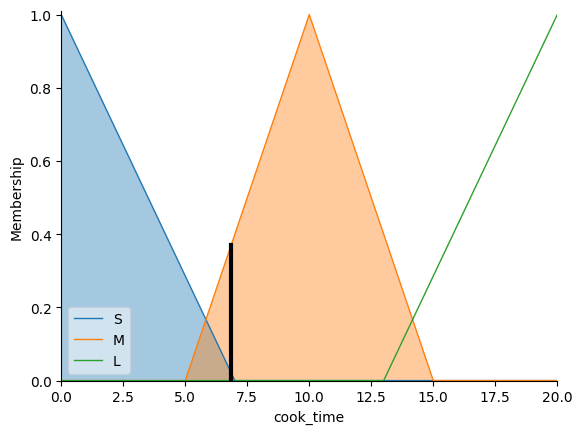

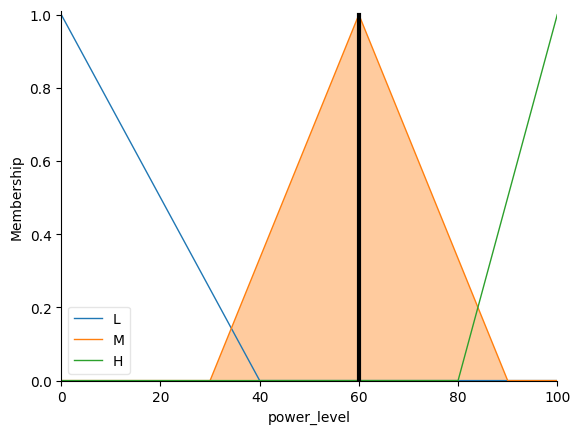

In [ ]:
#2.6
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

weight = ctrl.Antecedent(np.arange(0, 1010, 10), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
temp = ctrl.Antecedent(np.arange(0, 70, 1), 'temp')
cook_time = ctrl.Consequent(np.arange(0, 21, 1), 'cook_time')
power_level = ctrl.Consequent(np.arange(0, 110, 10), 'power_level')

weight['L'] = fuzz.trimf(weight.universe, [0, 0, 300])
weight['M'] = fuzz.trimf(weight.universe, [200, 500, 800])
weight['H'] = fuzz.trimf(weight.universe, [600, 1000, 1000])

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 3])
food_type['M'] = fuzz.trimf(food_type.universe, [2, 5, 8])
food_type['H'] = fuzz.trimf(food_type.universe, [7, 10, 10])

temp['C'] = fuzz.trimf(temp.universe, [0, 0, 15])
temp['W'] = fuzz.trimf(temp.universe, [10, 25, 40])
temp['H'] = fuzz.trimf(temp.universe, [35, 60, 60])

cook_time['S'] = fuzz.trimf(cook_time.universe, [0, 0, 7])
cook_time['M'] = fuzz.trimf(cook_time.universe, [5, 10, 15])
cook_time['L'] = fuzz.trimf(cook_time.universe, [13, 20, 20])

power_level['L'] = fuzz.trimf(power_level.universe, [0, 0, 40])
power_level['M'] = fuzz.trimf(power_level.universe, [30, 60, 90])
power_level['H'] = fuzz.trimf(power_level.universe, [80, 100, 100])

rule1 = ctrl.Rule(weight['L'], cook_time['S'])
rule2 = ctrl.Rule(weight['M'], cook_time['M'])
rule3 = ctrl.Rule(weight['H'], cook_time['L'])

rule4 = ctrl.Rule(food_type['S'], power_level['L'])
rule5 = ctrl.Rule(food_type['M'], power_level['M'])
rule6 = ctrl.Rule(food_type['H'], power_level['H'])

rule7 = ctrl.Rule(temp['C'], cook_time['L'])
rule8 = ctrl.Rule(temp['W'], cook_time['M'])
rule9 = ctrl.Rule(temp['H'], cook_time['S'])

rule10 = ctrl.Rule(weight['H']|food_type['H']|temp['C'], cook_time['L'],power_level['H'])
rule11 = ctrl.Rule(weight['M']|food_type['S']|temp['W'], cook_time['M'],power_level['L'])
rule12 = ctrl.Rule(weight['L']|food_type['M']|temp['H'], cook_time['S'],power_level['M'])

cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking_sim = ctrl.ControlSystemSimulation(cooking_ctrl)
cooking_sim.input['weight'] = 500
cooking_sim.input['food_type'] = 5
cooking_sim.input['temp'] = 20
cooking_sim.compute()
print(cooking_sim.output['cook_time'])
print(cooking_sim.output['power_level'])
cook_time.view(sim=cooking_sim)
power_level.view(sim=cooking_sim)

Cooking Time: 1.222222222222222
Heat Level: 0.9999999999999999


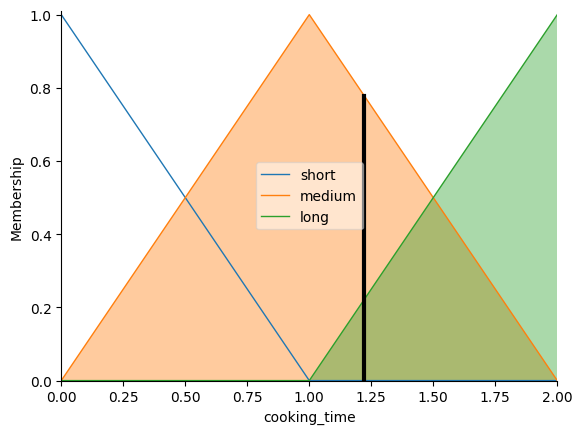

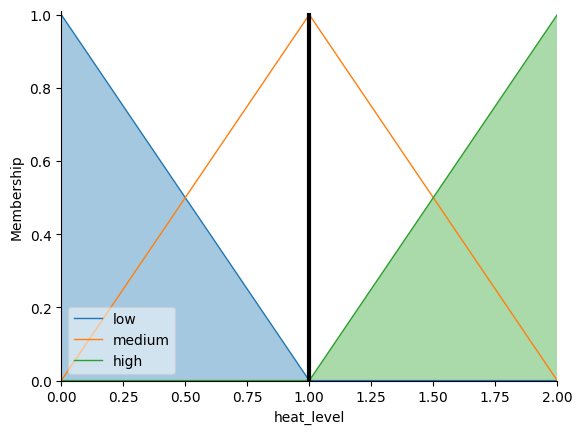

In [ ]:
#2.7
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 3, 1), 'food_weight')
initial_temp = ctrl.Antecedent(np.arange(0, 3, 1), 'initial_temp')
water_content = ctrl.Antecedent(np.arange(0, 3, 1), 'water_content')
cooking_time = ctrl.Consequent(np.arange(0, 3, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 3, 1), 'heat_level')

food_type.automf(3, names=['soft', 'medium', 'hard'])
food_weight.automf(3, names=['light', 'medium', 'heavy'])
initial_temp.automf(3, names=['cold', 'warm', 'hot'])
water_content.automf(3, names=['low', 'medium', 'high'])

cooking_time.automf(3, names=['short', 'medium', 'long'])
heat_level.automf(3, names=['low', 'medium', 'high'])

rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], heat_level['low'])
rule5 = ctrl.Rule(food_type['medium'], heat_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], heat_level['high'])

rule7 = ctrl.Rule(initial_temp['cold'], cooking_time['long'])
rule8 = ctrl.Rule(initial_temp['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(initial_temp['hot'], cooking_time['short'])

rule10 = ctrl.Rule(water_content['low'], heat_level['high'])
rule11 = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule12 = ctrl.Rule(water_content['high'], heat_level['low'])

cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking_simulation = ctrl.ControlSystemSimulation(cooking_ctrl)

cooking_simulation.input['food_type'] = 2
cooking_simulation.input['food_weight'] = 1
cooking_simulation.input['initial_temp'] = 0
cooking_simulation.input['water_content'] = 2
cooking_simulation.compute()
print("Cooking Time:", cooking_simulation.output['cooking_time'])
print("Heat Level:", cooking_simulation.output['heat_level'])
cooking_time.view(sim=cooking_simulation)
heat_level.view(sim=cooking_simulation)

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00


Drug Dosage Adjustment: -2.960594732333751e-17
Oxygen Therapy Adjustment: -8.673617379884034e-17


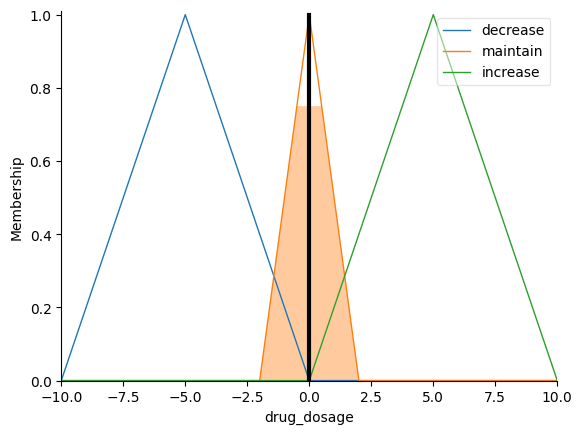

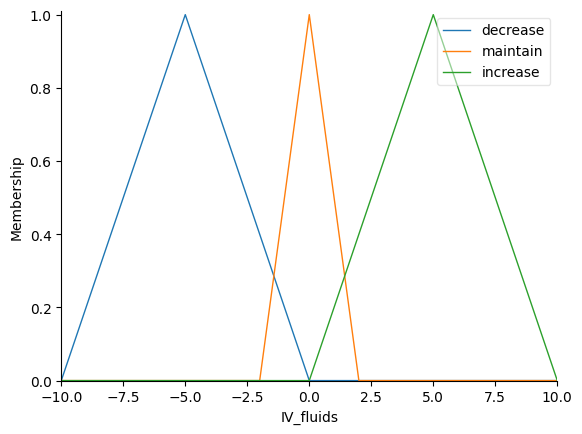

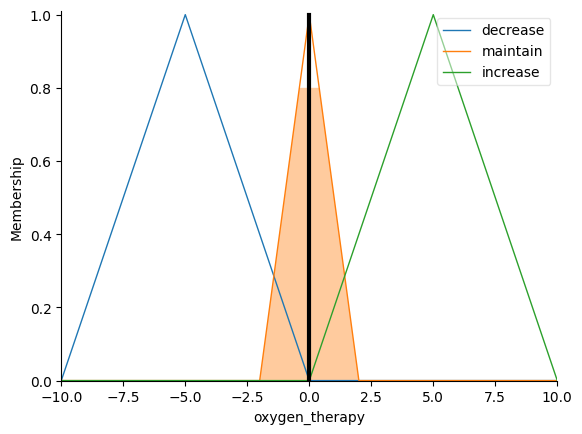

In [ ]:
#2.8
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

heart_rate = ctrl.Antecedent(np.arange(40, 161, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(35, 40, 0.1), 'body_temp')
oxygen_level = ctrl.Antecedent(np.arange(85, 101, 1), 'oxygen_level')
blood_sugar = ctrl.Antecedent(np.arange(50, 201, 1), 'blood_sugar')
drug_dosage = ctrl.Consequent(np.arange(-10, 11, 1), 'drug_dosage')
IV_fluids = ctrl.Consequent(np.arange(-10, 11, 1), 'IV_fluids')
oxygen_therapy = ctrl.Consequent(np.arange(-10, 11, 1), 'oxygen_therapy')

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 50, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [100, 120, 160])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [60, 75, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 130])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [130, 150, 180])

body_temp['low'] = fuzz.trimf(body_temp.universe, [35, 35.5, 36])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [36, 37, 37.5])
body_temp['high'] = fuzz.trimf(body_temp.universe, [37.5, 38.5, 40])

oxygen_level['low'] = fuzz.trimf(oxygen_level.universe, [85, 88, 90])
oxygen_level['normal'] = fuzz.trimf(oxygen_level.universe, [90, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 60, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 100, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [140, 160, 200])

drug_dosage['decrease'] = fuzz.trimf(drug_dosage.universe, [-10, -5, 0])
drug_dosage['maintain'] = fuzz.trimf(drug_dosage.universe, [-2, 0, 2])
drug_dosage['increase'] = fuzz.trimf(drug_dosage.universe, [0, 5, 10])

IV_fluids['decrease'] = fuzz.trimf(IV_fluids.universe, [-10, -5, 0])
IV_fluids['maintain'] = fuzz.trimf(IV_fluids.universe, [-2, 0, 2])
IV_fluids['increase'] = fuzz.trimf(IV_fluids.universe, [0, 5, 10])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [-10, -5, 0])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [-2, 0, 2])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [0, 5, 10])

rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], [IV_fluids['increase'], drug_dosage['increase']])
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], drug_dosage['decrease'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], drug_dosage['maintain'])
rule4 = ctrl.Rule(body_temp['high'] & oxygen_level['low'], [oxygen_therapy['increase'], drug_dosage['increase']])
rule5 = ctrl.Rule(body_temp['normal'] & oxygen_level['normal'], oxygen_therapy['maintain'])
rule6 = ctrl.Rule(body_temp['low'] & oxygen_level['low'], [oxygen_therapy['increase'], IV_fluids['increase']])
rule7 = ctrl.Rule(blood_sugar['high'], drug_dosage['increase'])
rule8 = ctrl.Rule(blood_sugar['low'], drug_dosage['decrease'])
rule9 = ctrl.Rule(blood_sugar['normal'], drug_dosage['maintain'])
rule10 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], drug_dosage['decrease'])
rule11 = ctrl.Rule(blood_pressure['low'] & oxygen_level['low'] & heart_rate['low'], [IV_fluids['increase'], oxygen_therapy['increase'], drug_dosage['increase']])
rule12 = ctrl.Rule(body_temp['high'] & blood_pressure['high'] & oxygen_level['normal'], [drug_dosage['increase'], oxygen_therapy['maintain']])

patient_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
patient_sim = ctrl.ControlSystemSimulation(patient_ctrl)
patient_sim.input['heart_rate'] = 85
patient_sim.input['blood_pressure'] = 120
patient_sim.input['body_temp'] = 37
patient_sim.input['oxygen_level'] = 96
patient_sim.input['blood_sugar'] = 110
patient_sim.compute()
print('Drug Dosage Adjustment:', patient_sim.output['drug_dosage'])
print('Oxygen Therapy Adjustment:', patient_sim.output['oxygen_therapy'])
drug_dosage.view(sim=patient_sim)
IV_fluids.view(sim=patient_sim)
oxygen_therapy.view(sim=patient_sim)

0.8644444444444442


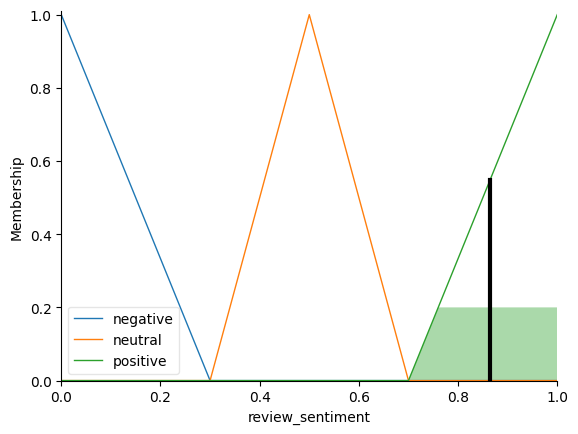

In [ ]:
#2.9
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')
review_sentiment = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_sentiment')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])
emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 0.3])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.7, 1, 1])
positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 4, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 10, 10])
negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 4, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 10, 10])
review_sentiment['negative'] = fuzz.trimf(review_sentiment.universe, [0, 0, 0.3])
review_sentiment['neutral'] = fuzz.trimf(review_sentiment.universe, [0.3, 0.5, 0.7])
review_sentiment['positive'] = fuzz.trimf(review_sentiment.universe, [0.7, 1, 1])

rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment['positive'])
rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_sentiment['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_sentiment['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_sentiment['neutral'])
rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_sentiment['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_sentiment['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_sentiment['positive'])

sentiment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
sentiment_simulation = ctrl.ControlSystemSimulation(sentiment_ctrl)
sentiment_simulation.input['sentiment_score'] = 0.8
sentiment_simulation.input['emotion_intensity'] = 0.7
sentiment_simulation.input['positive_words'] = 6
sentiment_simulation.input['negative_words'] = 1
sentiment_simulation.compute()
print(sentiment_simulation.output['review_sentiment'])
review_sentiment.view(sim=sentiment_simulation)


19.66190024128793
8.238095238095239
3.0


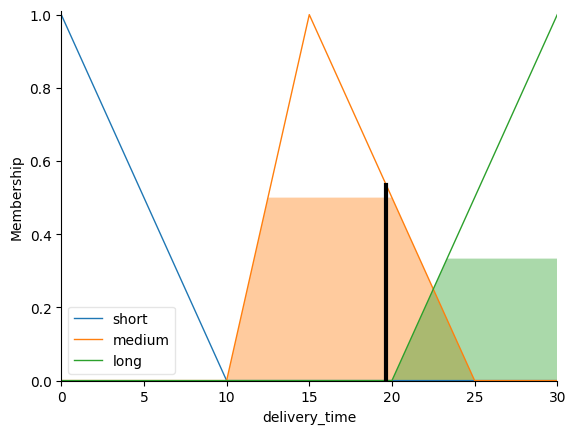

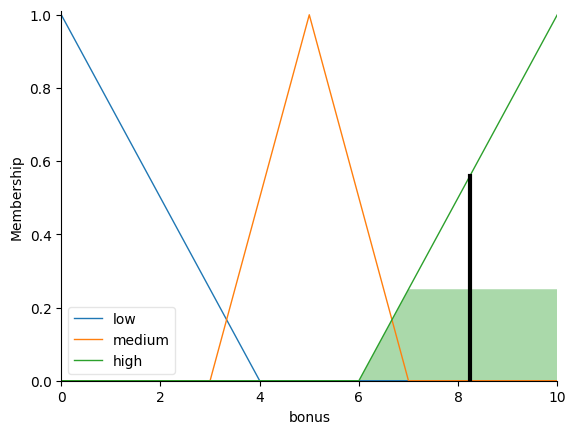

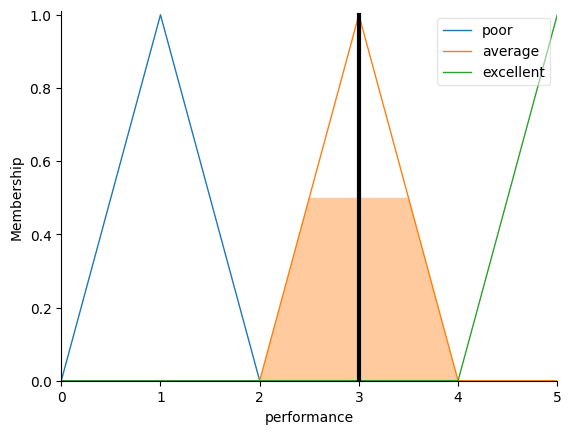

In [ ]:
#2.10
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

traffic = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 11, 1), 'weather')
prep_time = ctrl.Antecedent(np.arange(0, 21, 1), 'prep_time')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')
delivery_time = ctrl.Consequent(np.arange(0, 31, 1), 'delivery_time')
bonus = ctrl.Consequent(np.arange(0, 11, 1), 'bonus')
performance = ctrl.Consequent(np.arange(0, 6, 1), 'performance')

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 4])
traffic['medium'] = fuzz.trimf(traffic.universe, [3, 5, 7])
traffic['high'] = fuzz.trimf(traffic.universe, [6, 10, 10])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['medium'] = fuzz.trimf(distance.universe, [3, 5, 8])
distance['long'] = fuzz.trimf(distance.universe, [7, 10, 10])

weather['clear'] = fuzz.trimf(weather.universe, [0, 0, 3])
weather['rainy'] = fuzz.trimf(weather.universe, [2, 5, 7])
weather['stormy'] = fuzz.trimf(weather.universe, [6, 10, 10])

prep_time['fast'] = fuzz.trimf(prep_time.universe, [0, 0, 5])
prep_time['medium'] = fuzz.trimf(prep_time.universe, [4, 10, 15])
prep_time['slow'] = fuzz.trimf(prep_time.universe, [14, 20, 20])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 4])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 10, 10])

delivery_time['short'] = fuzz.trimf(delivery_time.universe, [0, 0, 10])
delivery_time['medium'] = fuzz.trimf(delivery_time.universe, [10, 15, 25])
delivery_time['long'] = fuzz.trimf(delivery_time.universe, [20, 30, 30])

bonus['low'] = fuzz.trimf(bonus.universe, [0, 0, 4])
bonus['medium'] = fuzz.trimf(bonus.universe, [3, 5, 7])
bonus['high'] = fuzz.trimf(bonus.universe, [6, 10, 10])

performance['poor'] = fuzz.trimf(performance.universe, [1, 1, 2])
performance['average'] = fuzz.trimf(performance.universe, [2, 3, 4])
performance['excellent'] = fuzz.trimf(performance.universe, [4, 5, 5])

rule1 = ctrl.Rule(traffic['low'] & distance['short'], delivery_time['short'])
rule2 = ctrl.Rule(traffic['medium'] & distance['medium'], delivery_time['medium'])
rule3 = ctrl.Rule(traffic['high'] & distance['long'], delivery_time['long'])

rule4 = ctrl.Rule(weather['clear'], bonus['low'])
rule5 = ctrl.Rule(weather['rainy'], bonus['medium'])
rule6 = ctrl.Rule(weather['stormy'], bonus['high'])

rule7 = ctrl.Rule(prep_time['fast'] & traffic['low'], delivery_time['short'])
rule8 = ctrl.Rule(prep_time['medium'] & traffic['medium'], delivery_time['medium'])
rule9 = ctrl.Rule(prep_time['slow'] & traffic['high'], delivery_time['long'])

rule10 = ctrl.Rule(fatigue['low'], performance['excellent'])
rule11 = ctrl.Rule(fatigue['medium'], performance['average'])
rule12 = ctrl.Rule(fatigue['high'], performance['poor'])

rule13 = ctrl.Rule(distance['long']|weather['stormy']|traffic['high'], delivery_time['long'], bonus['high'])
rule14 = ctrl.Rule(distance['short']|weather['clear']|traffic['low'], delivery_time['short'],bonus['low'])
rule15 = ctrl.Rule(fatigue['high']|traffic['high'], performance['poor'],delivery_time['long'])

system_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
food_delivery = ctrl.ControlSystemSimulation(system_ctrl)
food_delivery.input['traffic'] = 6
food_delivery.input['distance'] = 8
food_delivery.input['weather'] = 7
food_delivery.input['prep_time'] = 12
food_delivery.input['fatigue'] = 4
food_delivery.compute()
print(food_delivery.output['delivery_time'])
print(food_delivery.output['bonus'])
print(food_delivery.output['performance'])
delivery_time.view(sim=food_delivery)
bonus.view(sim=food_delivery)
performance.view(sim=food_delivery)

4.833333333333333


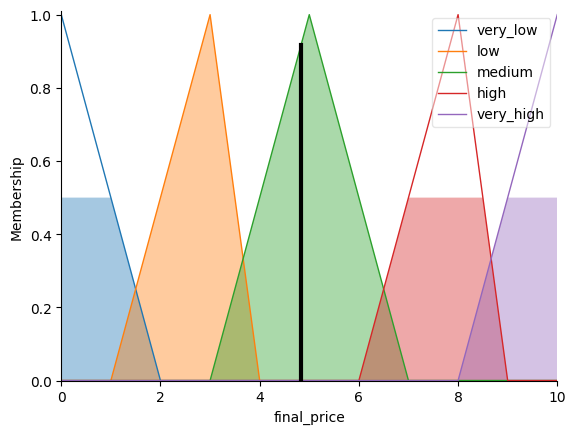

In [ ]:
#2.11
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

market_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'market_demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')
final_price = ctrl.Consequent(np.arange(0, 11, 1), 'final_price')

market_demand['low'] = fuzz.trimf(market_demand.universe, [0, 0, 4])
market_demand['medium'] = fuzz.trimf(market_demand.universe, [3, 5, 7])
market_demand['high'] = fuzz.trimf(market_demand.universe, [6, 10, 10])

competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 4])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [3, 5, 7])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [6, 10, 10])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 4])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['high'] = fuzz.trimf(production_cost.universe, [6, 10, 10])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 4])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['high'] = fuzz.trimf(stock_level.universe, [6, 10, 10])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 2])
final_price['low'] = fuzz.trimf(final_price.universe, [1, 3, 4])
final_price['medium'] = fuzz.trimf(final_price.universe, [3, 5, 7])
final_price['high'] = fuzz.trimf(final_price.universe, [6, 8, 9])
final_price['very_high'] = fuzz.trimf(final_price.universe, [8, 10, 10])

rule1 = ctrl.Rule(market_demand['high']|competitor_price['high']|stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(market_demand['high']|seasonality['peak']|stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(market_demand['medium']|production_cost['high']|stock_level['low'], final_price['very_high'])
rule4 = ctrl.Rule(market_demand['high']|competitor_price['medium']|stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(market_demand['medium']|competitor_price['high']|stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(market_demand['medium']|seasonality['peak']|stock_level['medium'], final_price['high'])
rule7 = ctrl.Rule(market_demand['medium']|competitor_price['medium']|stock_level['medium'], final_price['medium'])
rule8 = ctrl.Rule(market_demand['medium']|competitor_price['high']|stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(market_demand['low']|competitor_price['high']|stock_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(market_demand['medium']|production_cost['medium']|stock_level['medium'], final_price['medium'])
rule11 = ctrl.Rule(market_demand['low']|competitor_price['low']|stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(market_demand['medium']|production_cost['medium']|stock_level['high'], final_price['low'])
rule13 = ctrl.Rule(market_demand['low']|seasonality['off_peak']|stock_level['high'], final_price['low'])
rule14 = ctrl.Rule(market_demand['low']|competitor_price['low']|stock_level['high'], final_price['very_low'])
rule15 = ctrl.Rule(market_demand['low']|seasonality['off_peak']|stock_level['high'], final_price['very_low'])
rule16 = ctrl.Rule(market_demand['medium']|competitor_price['low']|stock_level['high'], final_price['very_low'])

pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,rule11, rule12, rule13, rule14, rule15, rule16])
pricing_simulation = ctrl.ControlSystemSimulation(pricing_ctrl)
pricing_simulation.input['market_demand'] = 6
pricing_simulation.input['competitor_price'] = 7
pricing_simulation.input['production_cost'] = 5
pricing_simulation.input['seasonality'] = 8
pricing_simulation.input['stock_level'] = 4
pricing_simulation.compute()
print(pricing_simulation.output['final_price'])
final_price.view(sim=pricing_simulation)

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


giá xe: 1.632136164896939
điểm thưởng: 1.6263520157325466


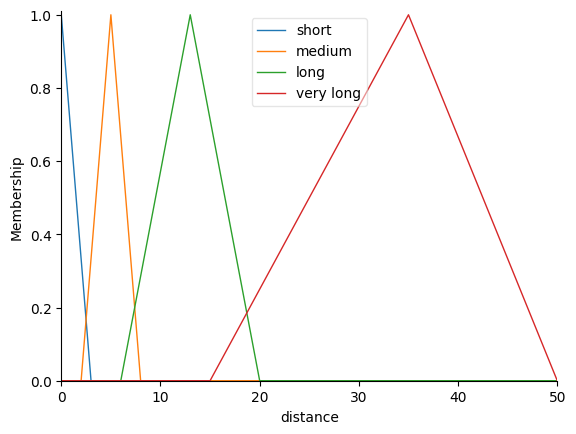

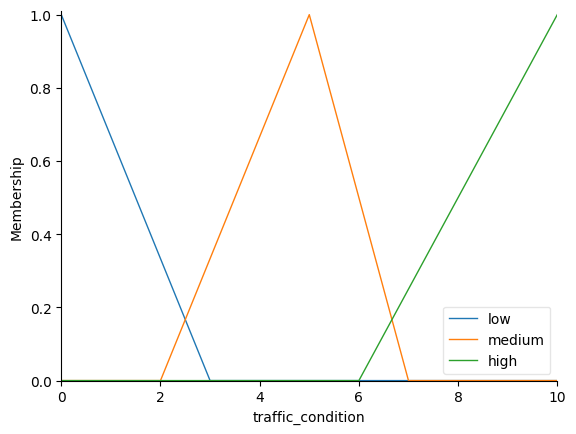

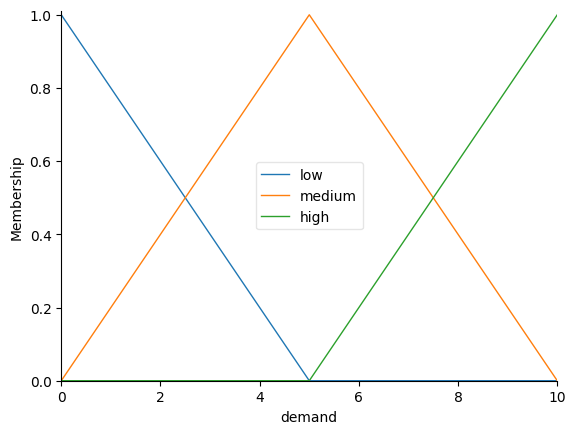

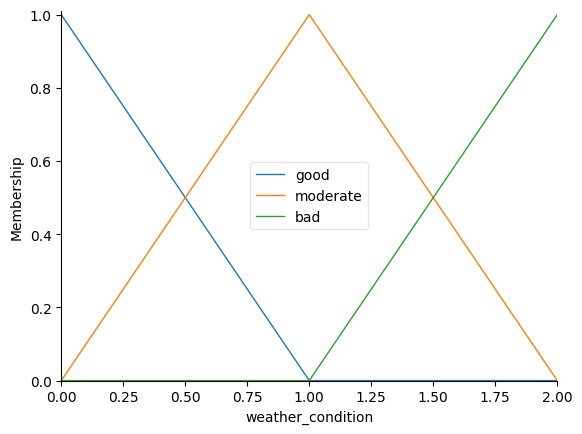

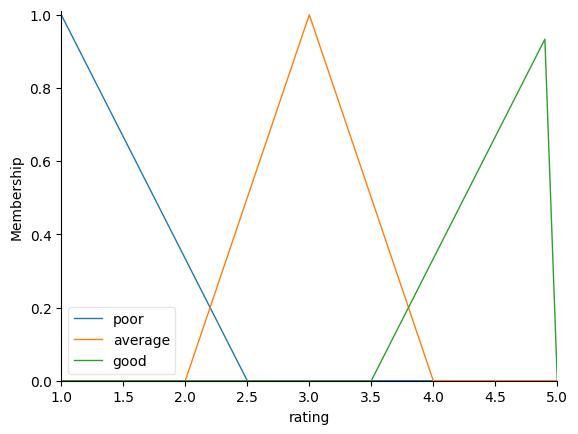

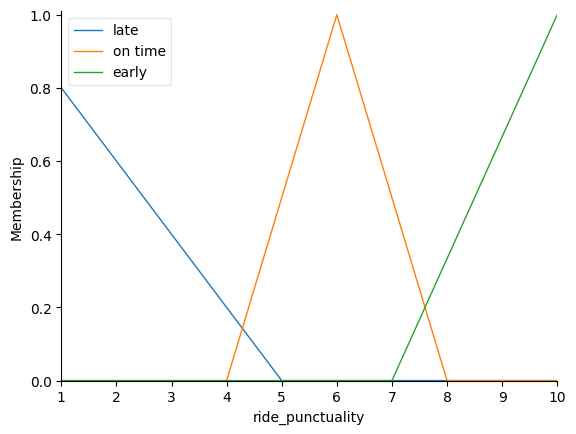

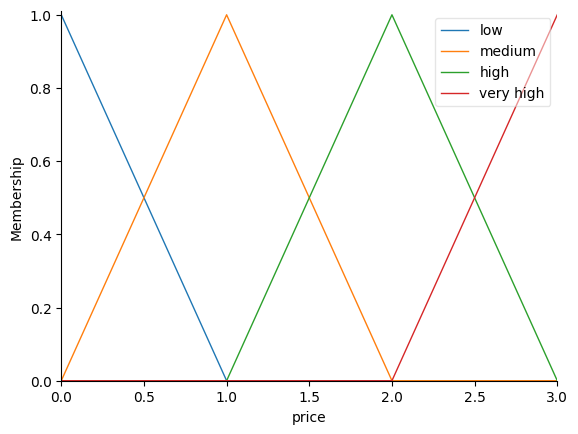

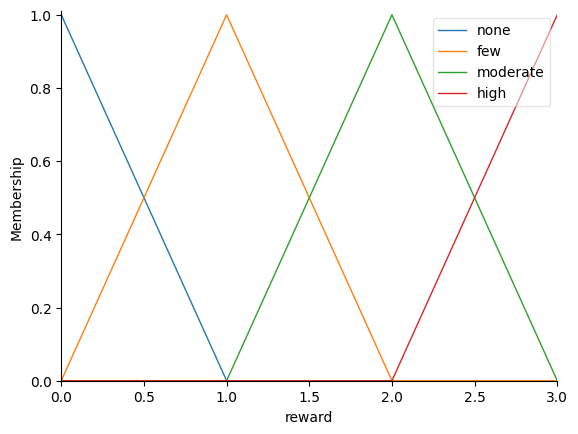

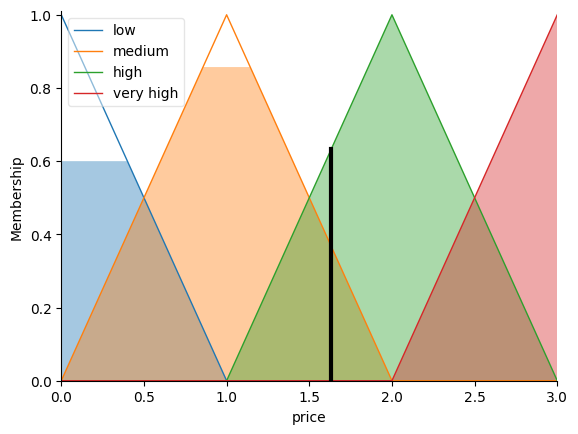

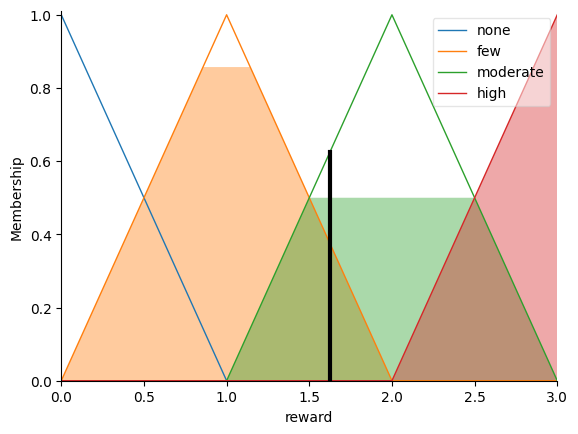

In [ ]:
#grab1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
distance=ctrl.Antecedent(np.arange(0,50.1,1), 'distance')
traffic_condition=ctrl.Antecedent(np.arange(0,10.1,1),'traffic_condition')
demand=ctrl.Antecedent(np.arange(0,10.1,1), 'demand')
weather_condition=ctrl.Antecedent(np.arange(0,2.1,1), 'weather_condition')
rating=ctrl.Antecedent(np.arange(1,5.1,0.1), 'rating')
ride_punctuality=ctrl.Antecedent(np.arange(1,10.1,1), 'ride_punctuality')
price=ctrl.Consequent(np.arange(0,3.1,1), 'price')
reward=ctrl.Consequent(np.arange(0,3.1,1), 'reward')
distance['short']=fuzz.trimf(distance.universe, [0,0,3])
distance['medium']=fuzz.trimf(distance.universe, [2,5,8])
distance['long']=fuzz.trimf(distance.universe, [6,13,20])
distance['very long']=fuzz.trimf(distance.universe, [15,35,50])
distance.view()
traffic_condition['low']=fuzz.trimf(traffic_condition.universe, [0,0,3])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe, [2,5,7])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe, [6,10,10])
traffic_condition.view()
demand['low']=fuzz.trimf(demand.universe, [0,0,5])
demand['medium']=fuzz.trimf(demand.universe, [0,5,10])
demand['high']=fuzz.trimf(demand.universe, [5,10,10])
demand.view()
weather_condition['good']=fuzz.trimf(weather_condition.universe, [0,0,1])
weather_condition['moderate']=fuzz.trimf(weather_condition.universe, [0,1,2])
weather_condition['bad']=fuzz.trimf(weather_condition.universe, [1,2,2])
weather_condition.view()
rating['poor']=fuzz.trimf(rating.universe, [1,1,2.5])
rating['average']=fuzz.trimf(rating.universe, [2,3,4])
rating['good']=fuzz.trimf(rating.universe, [3.5,5,5])
rating.view()
ride_punctuality['late']=fuzz.trimf(ride_punctuality.universe, [0,0,5])
ride_punctuality['on time']=fuzz.trimf(ride_punctuality.universe, [4,6,8])
ride_punctuality['early']=fuzz.trimf(ride_punctuality.universe, [7,10,10])
ride_punctuality.view()
price['low']=fuzz.trimf(price.universe, [0,0,1])
price['medium']=fuzz.trimf(price.universe, [0,1,2])
price['high']=fuzz.trimf(price.universe, [1,2,3])
price['very high']=fuzz.trimf(price.universe, [2,3,3])
price.view()
reward['none']=fuzz.trimf(reward.universe, [0,0,1])
reward['few']=fuzz.trimf(reward.universe, [0,1,2])
reward['moderate']=fuzz.trimf(reward.universe, [1,2,3])
reward['high']=fuzz.trimf(reward.universe, [2,3,3])
reward.view()
rule1=ctrl.Rule(distance['short'] | traffic_condition['low'] | demand['low'], price['low'])
rule2=ctrl.Rule(distance['short'] | traffic_condition['medium'] | demand['high'], price['medium'])
rule3=ctrl.Rule(distance['medium'] | traffic_condition['high'] | demand['high'], price['high'])
rule4=ctrl.Rule(distance['long'] | traffic_condition['medium'] | weather_condition['good'], price['medium'])
rule5=ctrl.Rule(distance['long'] | traffic_condition['high'] | weather_condition['bad'], price['high'])
rule6=ctrl.Rule(distance['very long'] | traffic_condition['high'] | demand['high'], price['very high'])
rule7=ctrl.Rule(distance['medium'] | traffic_condition['low'] | demand['low'], price['medium'])
rule8=ctrl.Rule(distance['short'] | traffic_condition['high'] | weather_condition['bad'], price['high'])
rule9=ctrl.Rule(distance['very long'] | weather_condition['bad'], price['very high'])
rule10=ctrl.Rule(distance['medium'] | traffic_condition['medium'] | weather_condition['moderate'], price['medium'])
rule11=ctrl.Rule(rating['good'] | ride_punctuality['early'], reward['high'])
rule12=ctrl.Rule(rating['average'] | ride_punctuality['on time'], reward['moderate'])
rule13=ctrl.Rule(rating['poor'] | ride_punctuality['late'], reward['none'])
rule14=ctrl.Rule(distance['long'] | traffic_condition['high'] | ride_punctuality['on time'], reward['high'])
rule15=ctrl.Rule(distance['medium'] | traffic_condition['medium'] | rating['good'], reward['moderate'])
rule16=ctrl.Rule(rating['poor'] | ride_punctuality['late'], reward['none'])
rule17=ctrl.Rule(distance['very long'] | weather_condition['bad'] | rating['good'], reward['high'])
rule18=ctrl.Rule(distance['short'] | ride_punctuality['on time'] | rating['average'], reward['few'])
rule19=ctrl.Rule(distance['long'] | traffic_condition['high'] | ride_punctuality['late'], reward['few'])
rule20=ctrl.Rule(distance['medium'] | weather_condition['moderate'] | rating['good'], reward['moderate'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['distance']=12
fuzzy_system.input['traffic_condition']=6
fuzzy_system.input['demand']=2
fuzzy_system.input['weather_condition']=5
fuzzy_system.input['rating']=4
fuzzy_system.input['ride_punctuality']=7

fuzzy_system.compute()
print("giá xe:", fuzzy_system.output['price'])
print("điểm thưởng:", fuzzy_system.output['reward'])
price.view(sim=fuzzy_system)
reward.view(sim=fuzzy_system)

chiết khấu: 31.161691542288594


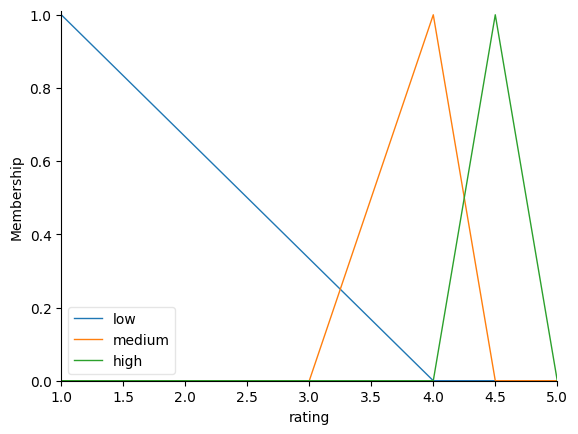

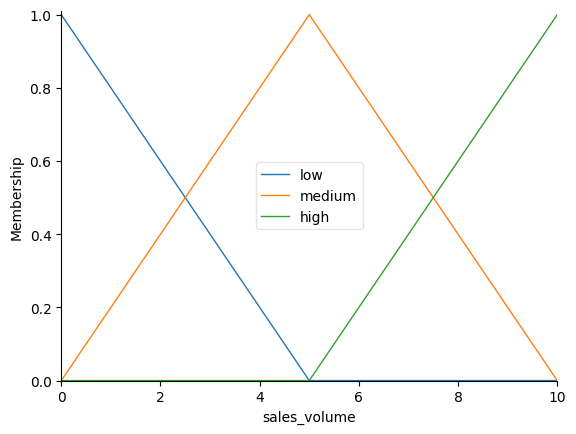

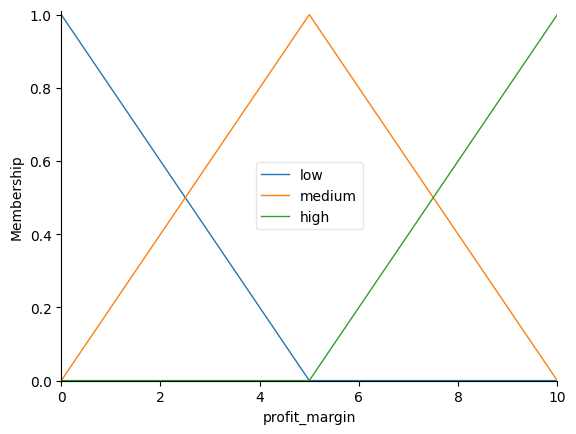

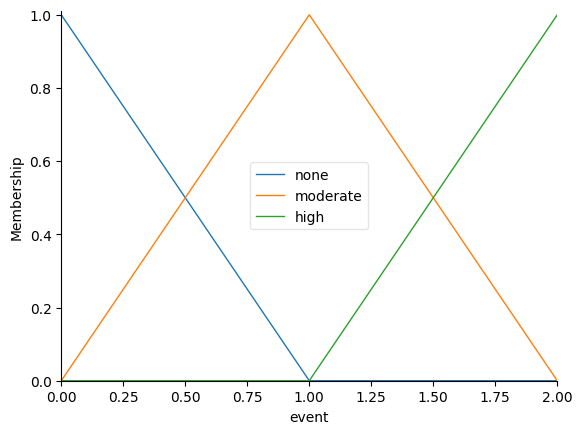

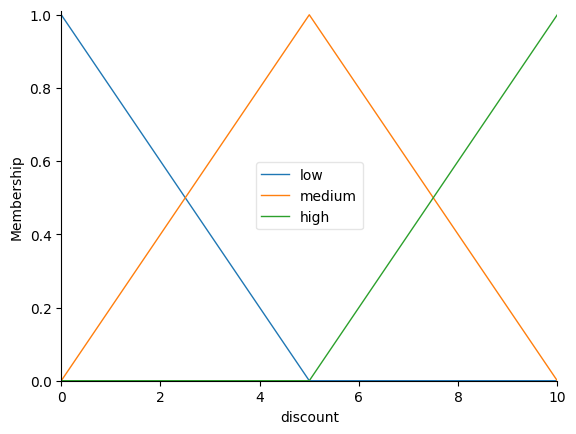

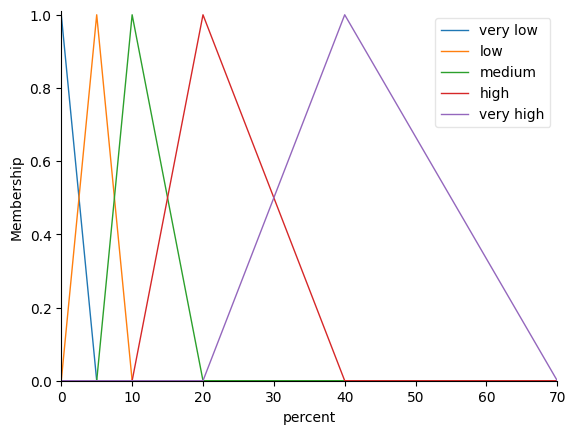

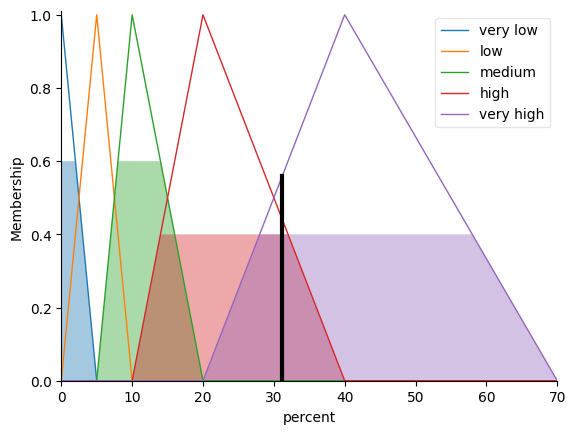

In [ ]:
#grab2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rating=ctrl.Antecedent(np.arange(1,5.1,0.1), 'rating')
sales_volume=ctrl.Antecedent(np.arange(0,10.2,1),'sales_volume')
profit_margin=ctrl.Antecedent(np.arange(0,10.1,1), 'profit_margin')
event=ctrl.Antecedent(np.arange(0,2.1,1), 'event')
discount=ctrl.Antecedent(np.arange(0,10.1,1), 'discount')
percent=ctrl.Consequent(np.arange(0,70.1,1), 'percent')
rating['low']=fuzz.trimf(rating.universe, [1,1,4])
rating['medium']=fuzz.trimf(rating.universe, [3,4,4.5])
rating['high']=fuzz.trimf(rating.universe, [4,4.5,5])
rating.view()
sales_volume['low']=fuzz.trimf(sales_volume.universe, [0,0,5])
sales_volume['medium']=fuzz.trimf(sales_volume.universe, [0,5,10])
sales_volume['high']=fuzz.trimf(sales_volume.universe, [5,10,10])
sales_volume.view()
profit_margin['low']=fuzz.trimf(profit_margin.universe, [0,0,5])
profit_margin['medium']=fuzz.trimf(profit_margin.universe, [0,5,10])
profit_margin['high']=fuzz.trimf(profit_margin.universe, [5,10,10])
profit_margin.view()
event['none']=fuzz.trimf(event.universe, [0,0,1])
event['moderate']=fuzz.trimf(event.universe, [0,1,2])
event['high']=fuzz.trimf(event.universe, [1,2,2])
event.view()
discount['low']=fuzz.trimf(discount.universe, [0,0,5])
discount['medium']=fuzz.trimf(discount.universe, [0,5,10])
discount['high']=fuzz.trimf(discount.universe, [5,10,10])
discount.view()
percent['very low']=fuzz.trimf(percent.universe, [0,0,5])
percent['low']=fuzz.trimf(percent.universe, [0,5,10])
percent['medium']=fuzz.trimf(percent.universe, [5,10,20])
percent['high']=fuzz.trimf(percent.universe, [10,20,40])
percent['very high']=fuzz.trimf(percent.universe, [20,40,70])
percent.view()

rule1=ctrl.Rule(rating['high'] | sales_volume['high'] | profit_margin['high'], percent['very low'])
rule2=ctrl.Rule(rating['low'] | sales_volume['low'] | profit_margin['high'], percent['high'])
rule3=ctrl.Rule(event['high'] | discount['high'], percent['very high'])
rule4=ctrl.Rule(rating['medium'] | sales_volume['medium'] | profit_margin['medium'], percent['medium'])
rule5=ctrl.Rule(discount['low'] | sales_volume['high'] | profit_margin['low'], percent['very low'])
rule6=ctrl.Rule(rating['low'] | event['none'], percent['medium'])
rule7=ctrl.Rule(sales_volume['low'] | profit_margin['low'], percent['very high'])

discount_percentage = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(discount_percentage)
fuzzy_system.input['rating']=5.2
fuzzy_system.input['sales_volume']=3
fuzzy_system.input['profit_margin']=7
fuzzy_system.input['event']=1.2
fuzzy_system.input['discount']=2
fuzzy_system.compute()
print("chiết khấu:", fuzzy_system.output['percent'])
percent.view(sim=fuzzy_system)

giảm giá: 33.33333333333334


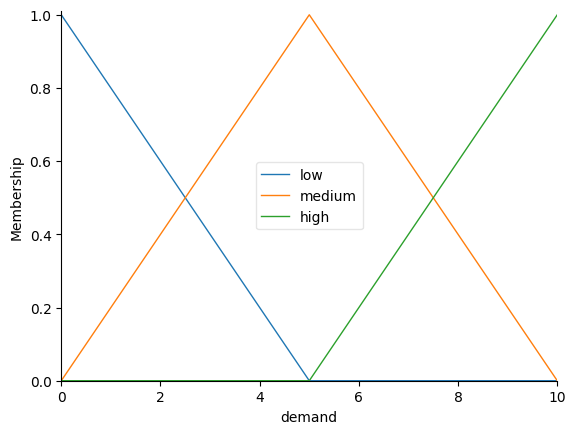

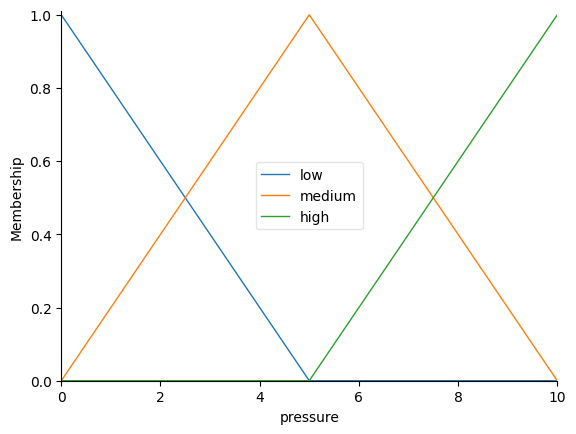

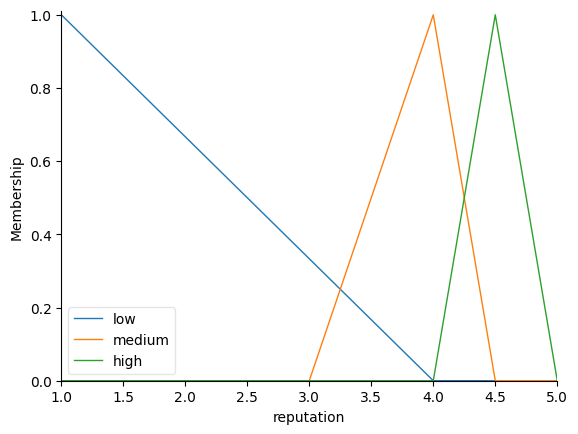

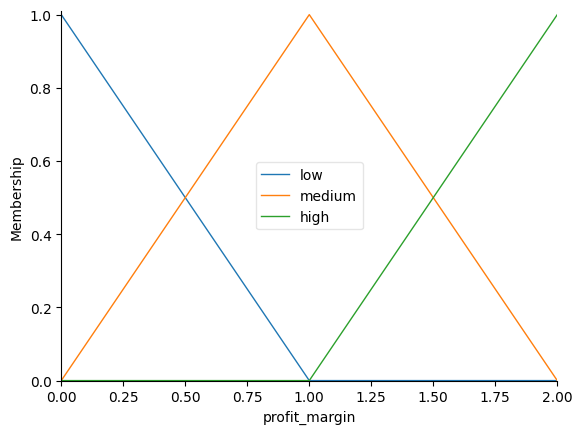

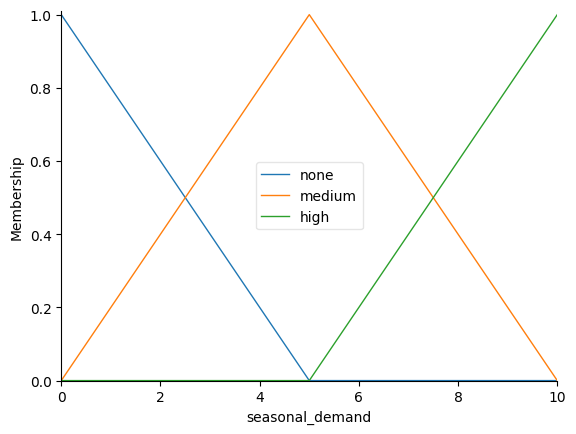

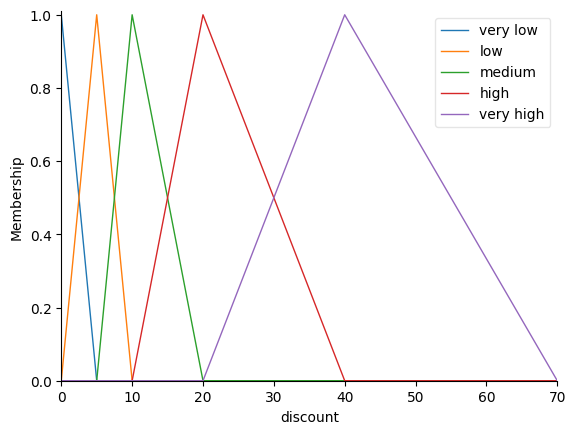

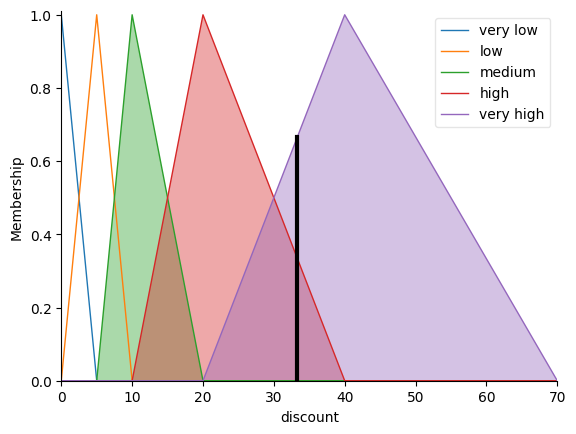

In [ ]:
#grab3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,10.1,1), 'demand')
pressure=ctrl.Antecedent(np.arange(0,10.1,1),'pressure')
reputation=ctrl.Antecedent(np.arange(1,5.1,0.5), 'reputation')
profit_margin=ctrl.Antecedent(np.arange(0,2.1,1), 'profit_margin')
seasonal_demand=ctrl.Antecedent(np.arange(0,10.1,1), 'seasonal_demand')
discount = ctrl.Consequent(np.arange(0,70.1,1), 'discount')
demand['low']=fuzz.trimf(demand.universe, [0,0,5])
demand['medium']=fuzz.trimf(demand.universe, [0,5,10])
demand['high']=fuzz.trimf(demand.universe, [5,10,10])
demand.view()
pressure['low']=fuzz.trimf(pressure.universe, [0,0,5])
pressure['medium']=fuzz.trimf(pressure.universe, [0,5,10])
pressure['high']=fuzz.trimf(pressure.universe, [5,10,10])
pressure.view()
reputation['low']=fuzz.trimf(reputation.universe, [1,1,4])
reputation['medium']=fuzz.trimf(reputation.universe, [3,4,4.5])
reputation['high']=fuzz.trimf(reputation.universe, [4,4.5,5])
reputation.view()
profit_margin['low']=fuzz.trimf(profit_margin.universe, [0,0,1])
profit_margin['medium']=fuzz.trimf(profit_margin.universe, [0,1,2])
profit_margin['high']=fuzz.trimf(profit_margin.universe, [1,2,2])
profit_margin.view()
seasonal_demand['none']=fuzz.trimf(seasonal_demand.universe, [0,0,5])
seasonal_demand['medium']=fuzz.trimf(seasonal_demand.universe, [0,5,10])
seasonal_demand['high']=fuzz.trimf(seasonal_demand.universe, [5,10,10])
seasonal_demand.view()
discount['very low']=fuzz.trimf(discount.universe, [0,0,5])
discount['low']=fuzz.trimf(discount.universe, [0,5,10])
discount['medium']=fuzz.trimf(discount.universe, [5,10,20])
discount['high']=fuzz.trimf(discount.universe, [10,20,40])
discount['very high']=fuzz.trimf(discount.universe, [20,40,70])
discount.view()

rule1=ctrl.Rule(demand['high'] | pressure['low'] | profit_margin['low'], discount['very low'])
rule2=ctrl.Rule(demand['low'] | pressure['high'] | profit_margin['high'], discount['high'])
rule3=ctrl.Rule(reputation['high'] | seasonal_demand['high'] | profit_margin['medium'], discount['medium'])
rule4=ctrl.Rule(seasonal_demand['high'] | pressure['high'] | profit_margin['high'], discount['very high'])
rule5=ctrl.Rule(demand['medium'] | reputation['low'] | profit_margin['low'], discount['medium'])
rule6=ctrl.Rule(demand['high'] | seasonal_demand['none'] | pressure['low'], discount['very low'])
rule7=ctrl.Rule(seasonal_demand['medium'] | pressure['medium'] | profit_margin['high'], discount['medium'])

discount_percentage = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(discount_percentage)
fuzzy_system.input['demand']=3
fuzzy_system.input['pressure']=8
fuzzy_system.input['profit_margin']=2
fuzzy_system.input['seasonal_demand']=5
fuzzy_system.input['reputation']=4.8
fuzzy_system.compute()
print("giảm giá:", fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)

số lg đơn hàng cần kết hợp: 4.121951219512195
ưu tiên giao hàng: 4.121951219512195


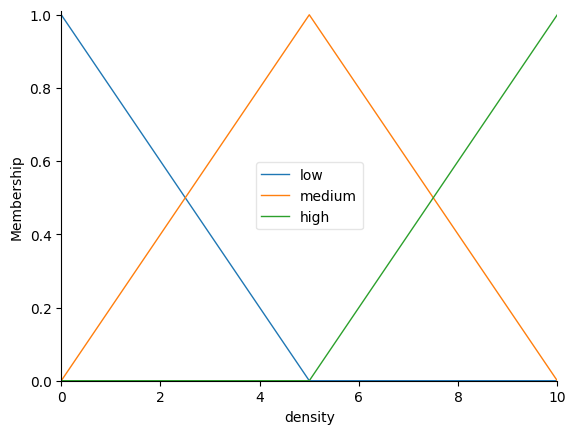

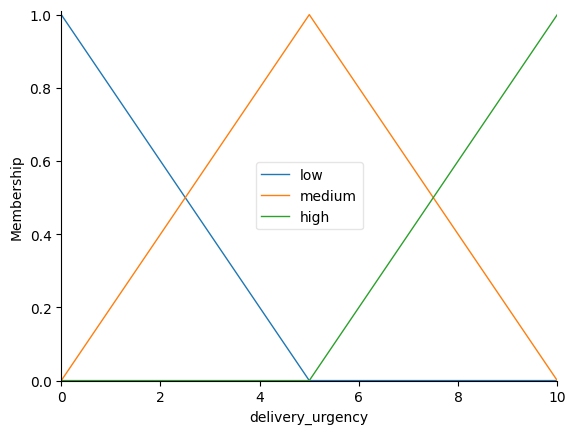

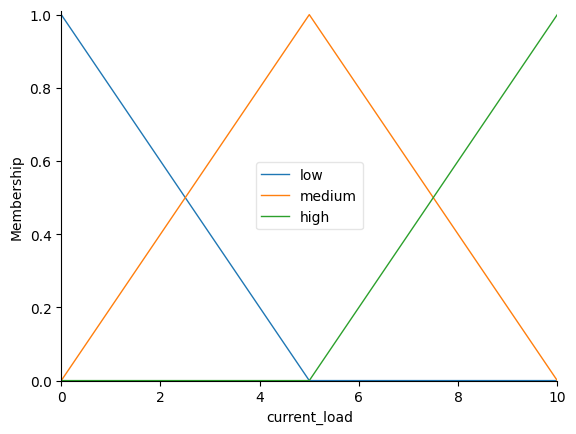

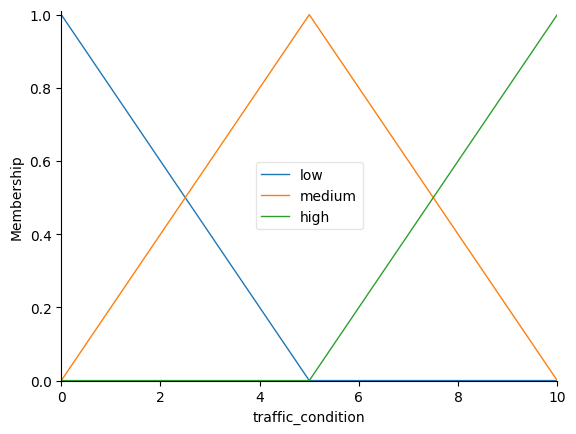

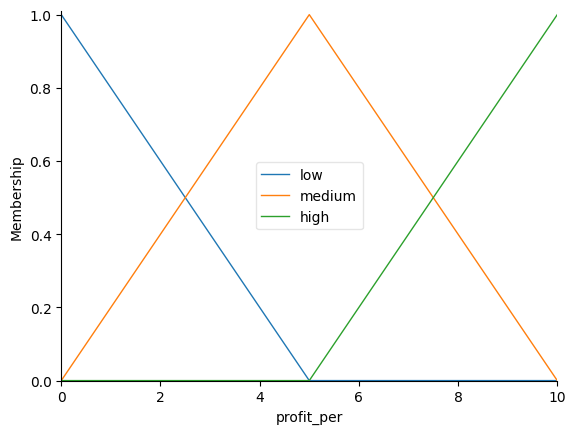

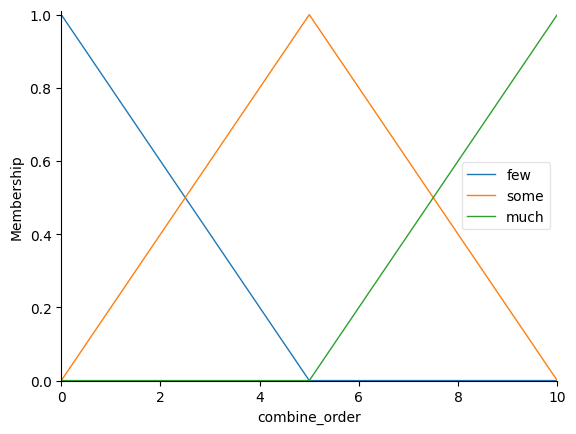

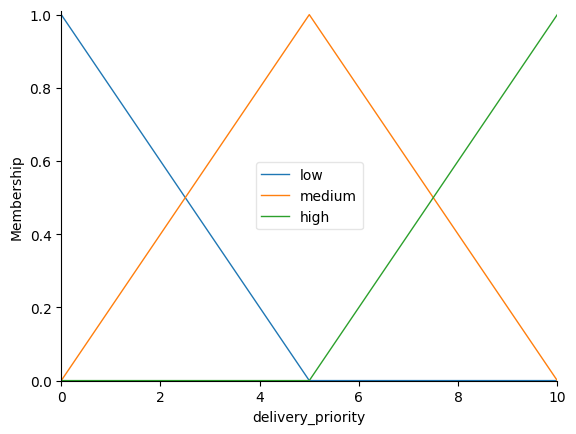

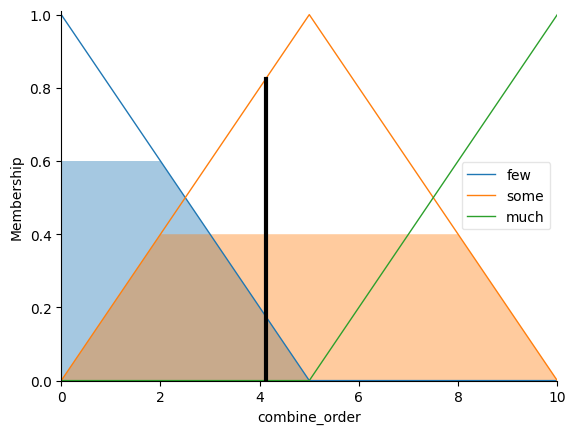

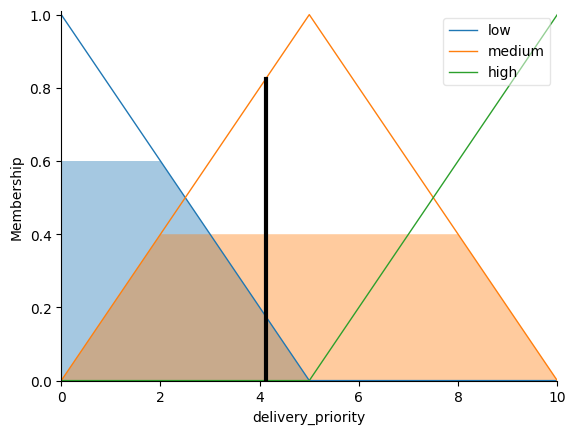

In [ ]:
#grab4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
density=ctrl.Antecedent(np.arange(0,10.1,1), 'density')
delivery_urgency=ctrl.Antecedent(np.arange(0,10.1,1),'delivery_urgency')
current_load=ctrl.Antecedent(np.arange(0,10.1,1), 'current_load')
traffic_condition=ctrl.Antecedent(np.arange(0,10.1,1), 'traffic_condition')
profit_per=ctrl.Antecedent(np.arange(0,10.1,1), 'profit_per')
combine_order = ctrl.Consequent(np.arange(0,10.1,1), 'combine_order')
delivery_priority = ctrl.Consequent(np.arange(0,10.1,1), 'delivery_priority')
density['low']=fuzz.trimf(density.universe, [0,0,5])
density['medium']=fuzz.trimf(density.universe, [0,5,10])
density['high']=fuzz.trimf(density.universe, [5,10,10])
delivery_urgency['low']=fuzz.trimf(delivery_urgency.universe, [0,0,5])
delivery_urgency['medium']=fuzz.trimf(delivery_urgency.universe, [0,5,10])
delivery_urgency['high']=fuzz.trimf(delivery_urgency.universe, [5,10,10])
current_load['low']=fuzz.trimf(current_load.universe, [0,0,5])
current_load['medium']=fuzz.trimf(current_load.universe, [0,5,10])
current_load['high']=fuzz.trimf(current_load.universe, [5,10,10])
traffic_condition['low']=fuzz.trimf(traffic_condition.universe, [0,0,5])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe, [0,5,10])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe, [5,10,10])
profit_per['low']=fuzz.trimf(profit_per.universe, [0,0,5])
profit_per['medium']=fuzz.trimf(profit_per.universe, [0,5,10])
profit_per['high']=fuzz.trimf(profit_per.universe, [5,10,10])
combine_order['few']=fuzz.trimf(combine_order.universe, [0,0,5])
combine_order['some']=fuzz.trimf(combine_order.universe, [0,5,10])
combine_order['much']=fuzz.trimf(combine_order.universe, [5,10,10])
delivery_priority['low']=fuzz.trimf(delivery_priority.universe, [0,0,5])
delivery_priority['medium']=fuzz.trimf(delivery_priority.universe, [0,5,10])
delivery_priority['high']=fuzz.trimf(delivery_priority.universe, [5,10,10])
rule1=ctrl.Rule(density['high'] | current_load['low'] | traffic_condition['low'], combine_order['much'])
rule2=ctrl.Rule(density['medium'] | traffic_condition['high'] | delivery_urgency['medium'], combine_order['few'])
rule3=ctrl.Rule(current_load['high'] | density['high'] | profit_per['medium'], combine_order['some'])
rule4=ctrl.Rule(density['low'] | delivery_urgency['high'] | traffic_condition['medium'], combine_order['few'])
rule5=ctrl.Rule(profit_per['high'] | delivery_urgency['high'] | traffic_condition['high'], combine_order['few'])
rule6=ctrl.Rule(delivery_urgency['high'] | profit_per['high'], delivery_priority['high'])
rule7=ctrl.Rule(delivery_urgency['medium'] | traffic_condition['medium'], delivery_priority['medium'])
rule8=ctrl.Rule(delivery_urgency['low'] | density['high'] | profit_per['low'], delivery_priority['low'])
control_system= ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['density']=3
fuzzy_system.input['delivery_urgency']=2
fuzzy_system.input['current_load']=6
fuzzy_system.input['traffic_condition']=8
fuzzy_system.input['profit_per']=2
fuzzy_system.compute()
print("số lượng đơn hàng cần kết hợp:", fuzzy_system.output['combine_order'])
print("ưu tiên giao hàng:", fuzzy_system.output['delivery_priority'])
combine_order.view(sim=fuzzy_system)
delivery_priority.view(sim=fuzzy_system)
density.view()
delivery_urgency.view()
current_load.view()
traffic_condition.view()
profit_per.view()
combine_order.view()
delivery_priority.view()